In [1]:
#importing important libraries for performing EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
f1=pd.read_excel('food_Train.xlsx',names=('type','id','cuisines','time','city','locality','rating','vote','price'))
f2=pd.read_excel('food_Test.xlsx',names=('type','id','cuisines','time','city','locality','rating','vote'))

In [3]:
f1.head(15)

,type,id,cuisines,time,city,locality,rating,vote,price
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [4]:
f2.head(10)

,type,id,cuisines,time,city,locality,rating,vote
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
5,"FOOD TRUCK,DESSERT PARLOR",4518,"Ice Cream, Desserts","2pm – 12midnight (Mon),1pm – 12:30AM (Tue-Sun)",Hyderabad,Banjara Hills,3.7,36 votes
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",Navi Mumbai,Kharghar,NEW,NaN
7,CASUAL DINING,5109,"Biryani, Chinese","12noon – 3:30pm, 7pm – 10pm (Mon-Sun)",Chennai,Navalur,4.0,703 votes
8,None,5606,"North Indian, Chinese, Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,IP Extension,3.4,475 votes
9,CASUAL DINING,14319,North Indian,Not Available,Kochi,Palarivattom,3.2,6 votes


In [5]:
f1.dtypes

type        object
id           int64
cuisines    object
time        object
city        object
locality    object
rating      object
vote        object
price        int64
dtype: object

In [6]:
f2.dtypes

type        object
id           int64
cuisines    object
time        object
city        object
locality    object
rating      object
vote        object
dtype: object

In [7]:
#not going to use time and id column
f1.drop(['id','time'],axis=1,inplace=True)
f2.drop(['id','time'],axis=1,inplace=True)

In [8]:
#splitting the vote column in f1 and f2
f1['vote']=(f1['vote'].str.split(" ").str[0])
f2['vote']=(f2['vote'].str.split(" ").str[0])

In [9]:
#checking number of unique values in all attributes in f1
for i in f1.columns:
    uniq=f1[i].nunique()
    print('numbers of unique values in :-',i,'=',uniq,'\n','______'*8,'\n')


numbers of unique values in :- type = 113 
 ________________________________________________ 

numbers of unique values in :- cuisines = 4155 
 ________________________________________________ 

numbers of unique values in :- city = 359 
 ________________________________________________ 

numbers of unique values in :- locality = 1416 
 ________________________________________________ 

numbers of unique values in :- rating = 32 
 ________________________________________________ 

numbers of unique values in :- vote = 1847 
 ________________________________________________ 

numbers of unique values in :- price = 86 
 ________________________________________________ 



In [10]:
#checking number of unique values in all attributes in f2
for i in f2.columns:
    uniq=f2[i].nunique()
    print('numbers of \'UNIQUE\' values in :-',i,'=',uniq,'\n','______'*8,'\n')


numbers of 'UNIQUE' values in :- type = 86 
 ________________________________________________ 

numbers of 'UNIQUE' values in :- cuisines = 1727 
 ________________________________________________ 

numbers of 'UNIQUE' values in :- city = 151 
 ________________________________________________ 

numbers of 'UNIQUE' values in :- locality = 834 
 ________________________________________________ 

numbers of 'UNIQUE' values in :- rating = 31 
 ________________________________________________ 

numbers of 'UNIQUE' values in :- vote = 1136 
 ________________________________________________ 



In [11]:
#checking null values() in f1 and replacing it
for i in f1.columns:
    nl=f1[i].isnull().sum()
    print('numbers of \'NULL\' values in :-',i,'=',nl,'\n','______'*8,'\n')

numbers of 'NULL' values in :- type = 0 
 ________________________________________________ 

numbers of 'NULL' values in :- cuisines = 0 
 ________________________________________________ 

numbers of 'NULL' values in :- city = 112 
 ________________________________________________ 

numbers of 'NULL' values in :- locality = 98 
 ________________________________________________ 

numbers of 'NULL' values in :- rating = 2 
 ________________________________________________ 

numbers of 'NULL' values in :- vote = 1204 
 ________________________________________________ 

numbers of 'NULL' values in :- price = 0 
 ________________________________________________ 



In [12]:
f1.loc[f1['rating'].isnull()]

,type,cuisines,city,locality,rating,vote,price
204,BAKERY,Bakery,Kochi,Marine Drive,NaN,NaN,200
421,CAFÉ,"Cafe, Fast Food",Hyderabad,Banjara Hills,NaN,NaN,350


In [13]:
#in 'rating' column there are 2 NaN values and there are words and symbol like NEW & - so replacing them
f1['rating'].fillna(0,inplace=True)
f1["rating"].replace("NEW",0,inplace=True)
f1["rating"].replace("-",0,inplace=True)

In [14]:
f1['rating'].isnull().sum()
#null values and odd words and symbols are replaced

0

In [15]:
#changing the datatype of rating column
f1['rating']=f1['rating'].astype('float64')

In [16]:
f1.loc[f1['vote'].isnull()]

,type,cuisines,city,locality,rating,vote,price
13,CASUAL DINING,South Indian,Kochi,Edappally,0.0,NaN,400
62,QUICK BITES,"North Indian, Beverages",Kochi,Kalamassery,0.0,NaN,200
69,None,"Pizza, Fast Food",New Delhi,Kalkaji,0.0,NaN,200
85,QUICK BITES,"North Indian, South Indian",Bangalore,Vijay Nagar,0.0,NaN,300
111,CASUAL DINING,"Gujarati, Rajasthani, North Indian",Mumbai,Borivali West,0.0,NaN,800
...,...,...,...,...,...,...,...
12630,CASUAL DINING,"Tex-Mex, Italian, Coffee",Gurgaon,Golf Course Road,0.0,NaN,1200
12641,CASUAL DINING,Kerala,Kochi,Pallimukku,0.0,NaN,300
12646,QUICK BITES,"Kerala, Chinese",Ernakulam,Market Road,0.0,NaN,300
12658,None,"Kerala, South Indian",Kochi,Chittoor Road,0.0,NaN,400


In [17]:
#here we can see that whereever the 'vote' column  have a nan value the rating is also 0 so replacing the NaN values of vote with 0
f1['vote'].replace(np.NaN,0,inplace=True)

In [18]:
f1['vote'].isnull().sum()
#all null values changed to 0

0

In [19]:
#changing the datatype of vote column
f1['vote']=f1['vote'].astype('int64')

In [20]:
f1.loc[f1['city'].isnull()]

,type,cuisines,city,locality,rating,vote,price
129,None,"North Indian, South Indian, Chinese, Continental",NaN,NaN,3.6,728,500
246,QUICK BITES,Biryani,NaN,Palarivattom Kochi,3.4,82,300
411,None,"North Indian, Chinese, Pizza, Burger, Fast Food",NaN,NaN,4.0,29,600
466,None,North Indian,NaN,NaN,4.2,55,200
481,None,Street Food,NaN,NaN,3.7,616,250
...,...,...,...,...,...,...,...
12280,None,"North Indian, Chinese",NaN,NaN,3.7,281,500
12314,CASUAL DINING,"North Indian, Bengali",NaN,Opposite to corporation bank and LIC office ba...,4.3,775,650
12447,QUICK BITES,"North Indian, Chinese, Mughlai, Seafood",NaN,Hyderabad,3.1,44,350
12567,None,"Biryani, Chinese, Fast Food, North Indian",NaN,NaN,3.7,656,300


In [21]:
#can't use mode as there are certain values where location are given and that belongs to another city 
f1['city'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
f1['locality'].replace(np.NaN,'NOT AVAILABLE',inplace=True)

In [22]:
f1.isnull().sum()
#all nan values have been removed

type        0
cuisines    0
city        0
locality    0
rating      0
vote        0
price       0
dtype: int64

In [23]:
#checking null values() in f2 and replacing it
for i in f2.columns:
    nl=f2[i].isnull().sum()
    print('numbers of \'NULL\' values in :-',i,'=',nl,'\n','______'*8,'\n')

numbers of 'NULL' values in :- type = 0 
 ________________________________________________ 

numbers of 'NULL' values in :- cuisines = 0 
 ________________________________________________ 

numbers of 'NULL' values in :- city = 35 
 ________________________________________________ 

numbers of 'NULL' values in :- locality = 30 
 ________________________________________________ 

numbers of 'NULL' values in :- rating = 2 
 ________________________________________________ 

numbers of 'NULL' values in :- vote = 402 
 ________________________________________________ 



In [24]:
f2.loc[f2['rating'].isnull()]

,type,cuisines,city,locality,rating,vote
2035,QUICK BITES,"Kerala, Arabian",Kochi,Kakkanad,NaN,NaN
2758,None,"Chinese, North Indian, South Indian",Kochi,Tripunithura,NaN,NaN


In [25]:
#in 'rating' column there are 2 NaN values and there are words and symbol like NEW & - so replacing them
f2['rating'].fillna(0,inplace=True)
f2["rating"].replace("NEW",0,inplace=True)
f2["rating"].replace("-",0,inplace=True)

In [26]:
f2['rating'].isnull().sum()

0

In [27]:
#changing the datatype of rating column
f2['rating']=f2['rating'].astype('float64')

In [28]:
f2.loc[f2['vote'].isnull()]

,type,cuisines,city,locality,rating,vote
6,CASUAL DINING,"North Indian, Street Food, Fast Food",Navi Mumbai,Kharghar,0.0,NaN
21,CASUAL DINING,"North Indian, South Indian",Chennai,Anna Salai,0.0,NaN
24,QUICK BITES,"Biryani, Andhra, North Indian",Bangalore,Banaswadi,0.0,NaN
27,CASUAL DINING,"Continental, Italian",Bangalore,BTM,0.0,NaN
29,QUICK BITES,"North Indian, Chinese",Mumbai,Bandra West,0.0,NaN
...,...,...,...,...,...,...
4183,CAFÉ,"Cafe, North Indian",Noida,Sector 63,0.0,NaN
4185,QUICK BITES,Fast Food,New Delhi,Shalimar Bagh,0.0,NaN
4198,QUICK BITES,Continental,Bangalore,Indiranagar,0.0,NaN
4223,CASUAL DINING,"Sindhi, Street Food",Mumbai,Lower Parel,0.0,NaN


In [29]:
#here we can see that whereever the 'vote' column  have a nan value the rating is also 0 so replacing the NaN values of vote with 0
f2['vote'].replace(np.NaN,0,inplace=True)

In [30]:
f2['vote'].isnull().sum()

0

In [31]:
#changing the datatype of vote column
f2['vote']=f2['vote'].astype('int64')

In [32]:
f2.loc[f2['city'].isnull()]

,type,cuisines,city,locality,rating,vote
164,None,"North Indian, Chinese, Momos, Beverages",NaN,NaN,3.5,321
169,QUICK BITES,"North Indian, Chinese",NaN,Chennai,3.5,161
205,None,South Indian,NaN,NaN,3.5,37
225,None,"North Indian, Chinese, Continental",NaN,NaN,4.5,50
308,None,"North Indian, Biryani, Kebab",NaN,NaN,0.0,0
341,None,"Fast Food, Mexican",NaN,NaN,4.6,115
493,None,"North Indian, Chinese, Continental",NaN,NaN,4.5,177
693,None,"Beverages, Desserts, Fast Food",NaN,NaN,3.5,13
710,QUICK BITES,"Arabian, North Indian, Chinese",NaN,Chennai,3.4,69
844,QUICK BITES,"Andhra, Hyderabadi, North Indian",NaN,NaN,3.3,430


In [33]:
#can't use mode as there are certain values where location are given and that belongs to another city 
f2['city'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
f2['locality'].replace(np.NaN,'NOT AVAILABLE',inplace=True)

In [34]:
f2.isnull().sum()
#all null values removed

type        0
cuisines    0
city        0
locality    0
rating      0
vote        0
dtype: int64

In [35]:
#checking for duplicates in f1 and removing if any
dups=f1.duplicated(keep='first').sum()
if dups>0:
    print('There are duplicated values in this set and removing it...')
    train=f1.drop_duplicates(keep='first')
    print('Earlier with duplicated values the shape was',f1.shape,'\nAfter removing duplocates shape become',train.shape,
          '\nTotal of',dups,'duplicated values were dropped.')
else:
    print('There is no DUPLICATED VALUES to drop')

There are duplicated values in this set and removing it...
Earlier with duplicated values the shape was (12690, 7) 
After removing duplocates shape become (12630, 7) 
Total of 60 duplicated values were dropped.


In [36]:
#checking for duplicates in f2 and removing if any
dups=f2.duplicated(keep='first').sum()
if dups>0:
    print('There are duplicated values in this set and removing it...')
    test=f2.drop_duplicates(keep='first')
    print('Earlier with duplicated values the shape was',f2.shape,'\nAfter removing duplocates shape become',test.shape,
          '\nTotal of',dups,'duplicated values were dropped.')
else:
    print('There is no DUPLICATED VALUES to drop')

There are duplicated values in this set and removing it...
Earlier with duplicated values the shape was (4231, 6) 
After removing duplocates shape become (4209, 6) 
Total of 22 duplicated values were dropped.


In [37]:
train.columns

Index(['type', 'cuisines', 'city', 'locality', 'rating', 'vote', 'price'], dtype='object')

In [38]:
train.head()

,type,cuisines,city,locality,rating,vote,price
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165,300


In [39]:
#finding maximum number of characteristics/values present in 'type' and 'cuisines' columns for train dataset
for i in ('type','cuisines'):
    max_split=1
    for x in range(len(train[i])):
        number=len(train[i].iloc[x].split(","))
        if number>max_split:
            max_split=number
    print("Max number of characters in",i,'is=',max_split,'\n','--'*20,'\n')


Max number of characters in type is= 2 
 ---------------------------------------- 

Max number of characters in cuisines is= 8 
 ---------------------------------------- 



In [40]:
#splitting type column into 2 part and dropping the 'type'
train['type1']=train['type'].str.split(',').str[0]
train['type2']=train['type'].str.split(',').str[1]


#splitting cuisines columns into 8 part and dropping cuisines 

train['cuis1']=train['cuisines'].str.split(',').str[0]
train['cuis2']=train['cuisines'].str.split(',').str[1]
train['cuis3']=train['cuisines'].str.split(',').str[2]
train['cuis4']=train['cuisines'].str.split(',').str[3]
train['cuis5']=train['cuisines'].str.split(',').str[4]
train['cuis6']=train['cuisines'].str.split(',').str[5]
train['cuis7']=train['cuisines'].str.split(',').str[6]
train['cuis8']=train['cuisines'].str.split(',').str[7]

#dropping 'type' and 'cuisines'

train.drop(['type','cuisines'],axis=1,inplace=True)


In [41]:
train.head(3)

,city,locality,rating,vote,price,type1,type2,cuis1,cuis2,cuis3,cuis4,cuis5,cuis6,cuis7,cuis8
0,Thane,Dombivali East,3.6,49,1200,CASUAL DINING,NaN,Malwani,Goan,North Indian,NaN,NaN,NaN,NaN,NaN
1,Chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NaN,NaN,NaN,NaN,NaN
2,Chennai,Saligramam,3.8,221,800,CASUAL DINING,NaN,North Indian,Chinese,Biryani,Hyderabadi,NaN,NaN,NaN,NaN


In [42]:
train.isnull().sum()

city            0
locality        0
rating          0
vote            0
price           0
type1           0
type2       11151
cuis1           0
cuis2        3028
cuis3        6951
cuis4        9941
cuis5       11617
cuis6       12217
cuis7       12455
cuis8       12553
dtype: int64

In [43]:
#replacing the nan values generated due to splitting with NOT AVAILABLE
train['type2'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
train['cuis2'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
train['cuis3'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
train['cuis4'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
train['cuis5'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
train['cuis6'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
train['cuis7'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
train['cuis8'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
train.isnull().sum()

city        0
locality    0
rating      0
vote        0
price       0
type1       0
type2       0
cuis1       0
cuis2       0
cuis3       0
cuis4       0
cuis5       0
cuis6       0
cuis7       0
cuis8       0
dtype: int64

**All null values replaced**

In [44]:
#splitting type column into 2 part and dropping the 'type' in test dataset
test['type1']=test['type'].str.split(',').str[0]
test['type2']=test['type'].str.split(',').str[1]


#splitting cuisines columns into 8 part and dropping cuisines in test dataset

test['cuis1']=test['cuisines'].str.split(',').str[0]
test['cuis2']=test['cuisines'].str.split(',').str[1]
test['cuis3']=test['cuisines'].str.split(',').str[2]
test['cuis4']=test['cuisines'].str.split(',').str[3]
test['cuis5']=test['cuisines'].str.split(',').str[4]
test['cuis6']=test['cuisines'].str.split(',').str[5]
test['cuis7']=test['cuisines'].str.split(',').str[6]
test['cuis8']=test['cuisines'].str.split(',').str[7]

#dropping 'type' and 'cuisines'

test.drop(['type','cuisines'],axis=1,inplace=True)


In [45]:
test.head(3)

,city,locality,rating,vote,type1,type2,cuis1,cuis2,cuis3,cuis4,cuis5,cuis6,cuis7,cuis8
0,Noida,Sector 18,4.3,564,CASUAL DINING,NaN,North Indian,Chinese,Mughlai,Kebab,NaN,NaN,NaN,NaN
1,Mumbai,Grant Road,4.2,61,QUICK BITES,NaN,South Indian,Fast Food,Pizza,North Indian,NaN,NaN,NaN,NaN
2,Mumbai,Marine Lines,3.8,350,CASUAL DINING,NaN,North Indian,Seafood,Biryani,Chinese,NaN,NaN,NaN,NaN


In [46]:
#replacing the nan values generated due to splitting with NOT AVAILABLE
test['type2'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
test['cuis2'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
test['cuis3'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
test['cuis4'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
test['cuis5'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
test['cuis6'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
test['cuis7'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
test['cuis8'].replace(np.NaN,'NOT AVAILABLE',inplace=True)
test.isnull().sum()

city        0
locality    0
rating      0
vote        0
type1       0
type2       0
cuis1       0
cuis2       0
cuis3       0
cuis4       0
cuis5       0
cuis6       0
cuis7       0
cuis8       0
dtype: int64

**All null values replaced**

In [47]:
train.max()

city                    ward X11
locality    shop no. 3 Sector 22
rating                       4.9
vote                       41186
price                      14000
type1                 SWEET SHOP
type2                 SWEET SHOP
cuis1                      Wraps
cuis2              NOT AVAILABLE
cuis3              NOT AVAILABLE
cuis4              NOT AVAILABLE
cuis5              NOT AVAILABLE
cuis6              NOT AVAILABLE
cuis7              NOT AVAILABLE
cuis8              NOT AVAILABLE
dtype: object

In [48]:
train.dtypes

city         object
locality     object
rating      float64
vote          int64
price         int64
type1        object
type2        object
cuis1        object
cuis2        object
cuis3        object
cuis4        object
cuis5        object
cuis6        object
cuis7        object
cuis8        object
dtype: object

In [49]:
#rearanging the columns in train and test dataset
train=train[['type1','type2','cuis1','cuis2','cuis3','cuis4','cuis5','cuis6','cuis7','cuis8','locality','city','rating','vote','price',]]
test=test[['type1','type2','cuis1','cuis2','cuis3','cuis4','cuis5','cuis6','cuis7','cuis8','locality','city','rating','vote',]]

In [50]:
train.head(2)

,type1,type2,cuis1,cuis2,cuis3,cuis4,cuis5,cuis6,cuis7,cuis8,locality,city,rating,vote,price
0,CASUAL DINING,NOT AVAILABLE,Malwani,Goan,North Indian,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,Dombivali East,Thane,3.6,49,1200
1,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,Ramapuram,Chennai,4.2,30,1500


In [51]:
test.head(2)

,type1,type2,cuis1,cuis2,cuis3,cuis4,cuis5,cuis6,cuis7,cuis8,locality,city,rating,vote
0,CASUAL DINING,NOT AVAILABLE,North Indian,Chinese,Mughlai,Kebab,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,Sector 18,Noida,4.3,564
1,QUICK BITES,NOT AVAILABLE,South Indian,Fast Food,Pizza,North Indian,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,Grant Road,Mumbai,4.2,61


In [52]:
train.groupby(train['type1']).mean()

,rating,vote,price
type1,,,
BAKERY,3.305322,221.645233,347.669623
BAR,3.790157,726.350394,1468.700787
BEVERAGE SHOP,3.018310,137.600939,256.666667
CAFÉ,3.628284,472.623324,681.032172
CASUAL DINING,3.577699,543.758713,833.762856
CLUB,3.752174,609.478261,2495.652174
COCKTAIL BAR,2.800000,373.166667,2550.000000
CONFECTIONERY,3.566667,48.333333,300.000000
DESSERT PARLOR,3.517227,220.090336,300.567227


In [53]:
train['type1'].value_counts()

QUICK BITES       4320
CASUAL DINING     4103
None              1000
CAFÉ               746
DESSERT PARLOR     476
BAKERY             451
FINE DINING        350
BAR                254
BEVERAGE SHOP      213
LOUNGE             153
PUB                103
SWEET SHOP         102
FOOD COURT          93
KIOSK               56
MESS                53
DHABA               45
MICROBREWERY        43
FOOD TRUCK          30
CLUB                23
COCKTAIL BAR         6
PAAN SHOP            4
MEAT SHOP            3
CONFECTIONERY        3
Name: type1, dtype: int64

In [54]:
train['cuis1'].value_counts()

North Indian     3117
South Indian     1236
Chinese           995
Fast Food         760
Cafe              710
                 ... 
Cafe Food           1
Ethiopian           1
Afghan              1
Roast Chicken       1
British             1
Name: cuis1, Length: 104, dtype: int64

In [55]:
train['city'].value_counts()

Chennai       2173
Bangalore     2143
Hyderabad     1819
Mumbai        1713
New Delhi     1317
              ... 
Chembur.         1
Karol Bagh       1
Kochi-18         1
Hosur Road       1
khar west        1
Name: city, Length: 360, dtype: int64

In [56]:
train['rating'].value_counts().sort_index()

0.0    1165
2.0       2
2.1       3
2.2       2
2.3      10
2.4      15
2.5      35
2.6      61
2.7      89
2.8     146
2.9     186
3.0     170
3.1     186
3.2     266
3.3     365
3.4     574
3.5     768
3.6     951
3.7    1086
3.8    1187
3.9    1233
4.0    1094
4.1     933
4.2     723
4.3     556
4.4     362
4.5     199
4.6     141
4.7      68
4.8      32
4.9      22
Name: rating, dtype: int64

In [57]:
train.describe()

,rating,vote,price
count,12630.000000,12630.000000,12630.000000
mean,3.436097,377.285273,656.575693
std,1.166918,812.431085,627.844176
min,0.000000,0.000000,20.000000
25%,3.400000,40.000000,300.000000
50%,3.800000,133.000000,500.000000
75%,4.000000,405.000000,800.000000
max,4.900000,41186.000000,14000.000000


In [58]:
train.describe(include='object')

,type1,type2,cuis1,cuis2,cuis3,cuis4,cuis5,cuis6,cuis7,cuis8,locality,city
count,12630,12630,12630,12630,12630,12630,12630,12630,12630,12630,12630,12630
unique,23,20,104,99,94,86,79,70,48,20,1417,360
top,QUICK BITES,NOT AVAILABLE,North Indian,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,Gachibowli,Chennai
freq,4320,11151,3117,3028,6951,9941,11617,12217,12455,12553,166,2173


**switching to graphical methods for more exploration**

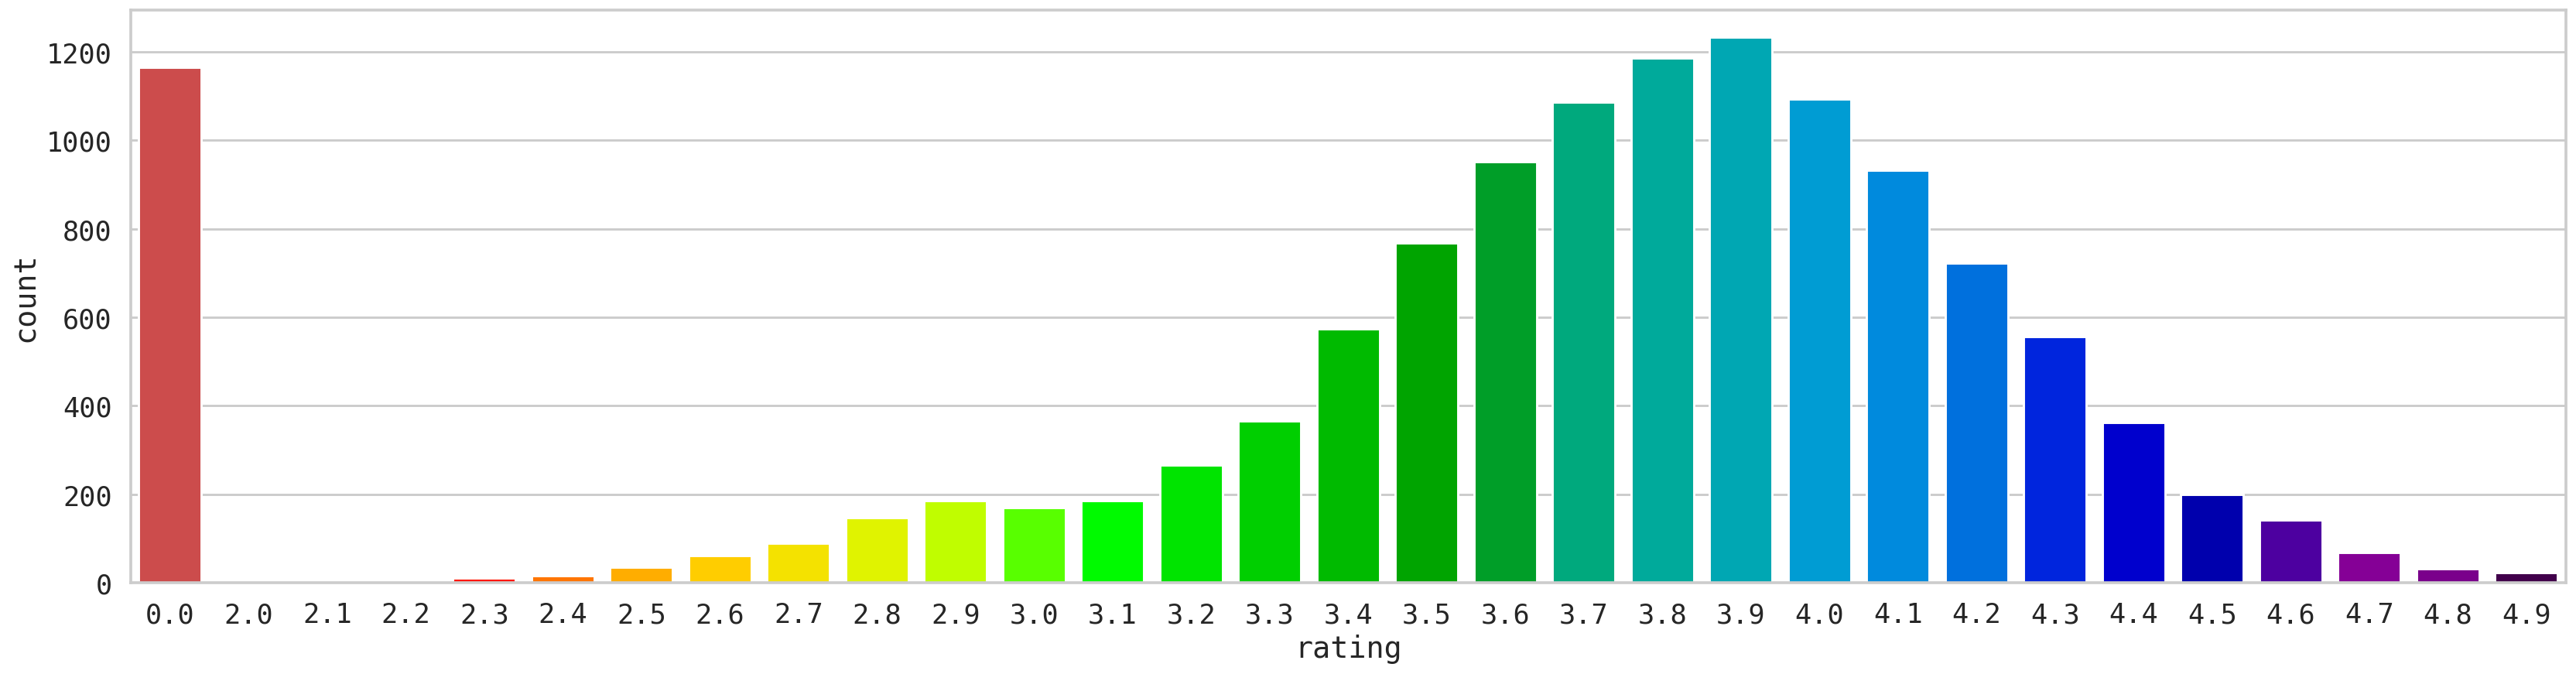

In [59]:
plt.figure(figsize=(29,7),dpi=140)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.countplot(x='rating',data=train,orient='v',palette='nipy_spectral_r',saturation=25)
plt.show()

                                      MOST OF THE RESTURANT HAVE A RATING OF 3.8 & 3.9

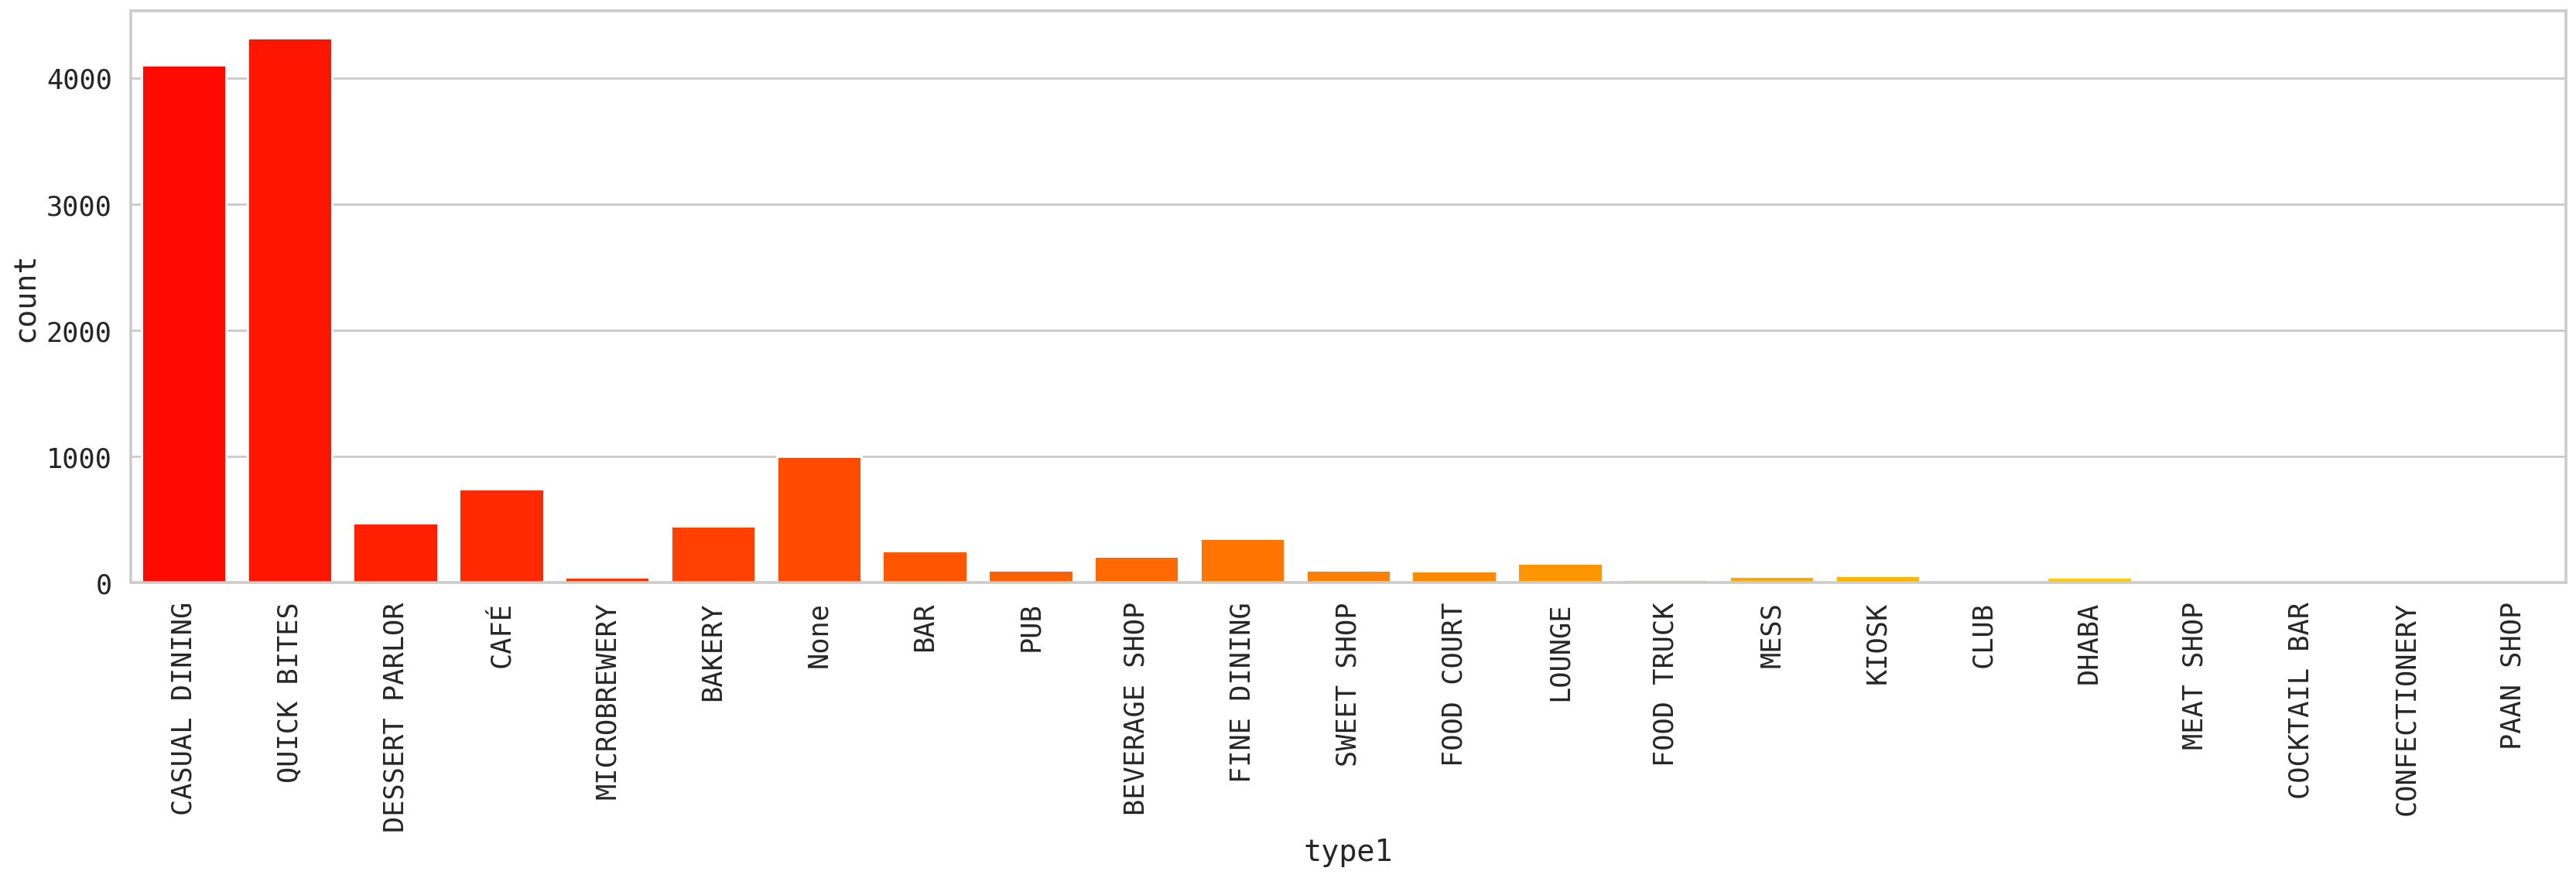

In [60]:
plt.figure(figsize=(29,7),dpi=140)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
m=sns.countplot(x='type1',data=train,orient='v',palette='autumn',saturation=25)
m.set_xticklabels(m.get_xticklabels(),rotation=90)
plt.show()

                            MOST OF THE RESTAURANTS OFFFERS CASUAL DINING & QUICK BITES

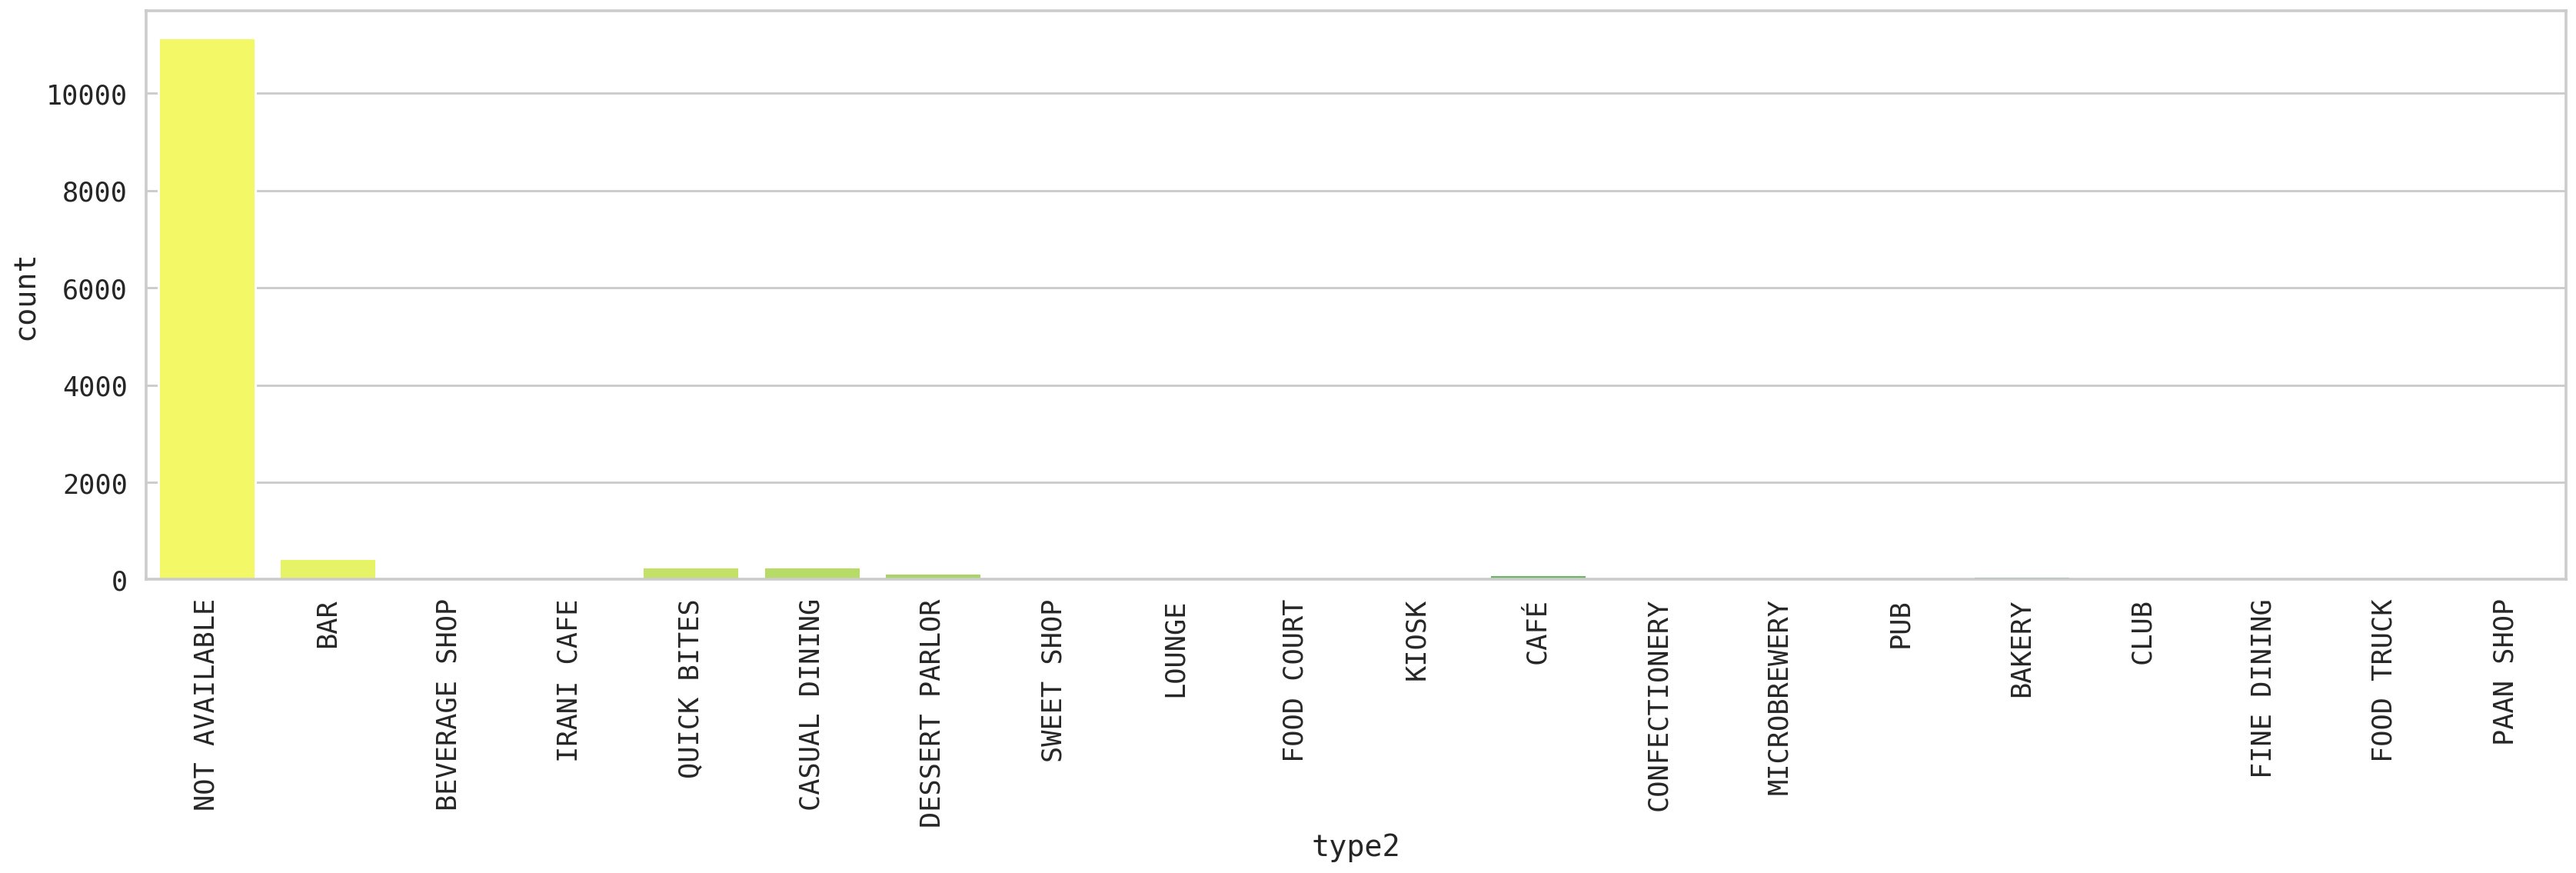

In [61]:
plt.figure(figsize=(29,7),dpi=140)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
m=sns.countplot(x='type2',data=train,orient='v',palette='summer_r',saturation=25)
m.set_xticklabels(m.get_xticklabels(),rotation=90)
plt.show()

                                    FEW RESTAURANT HAVE BAR IN IT AS SECOND OPTION

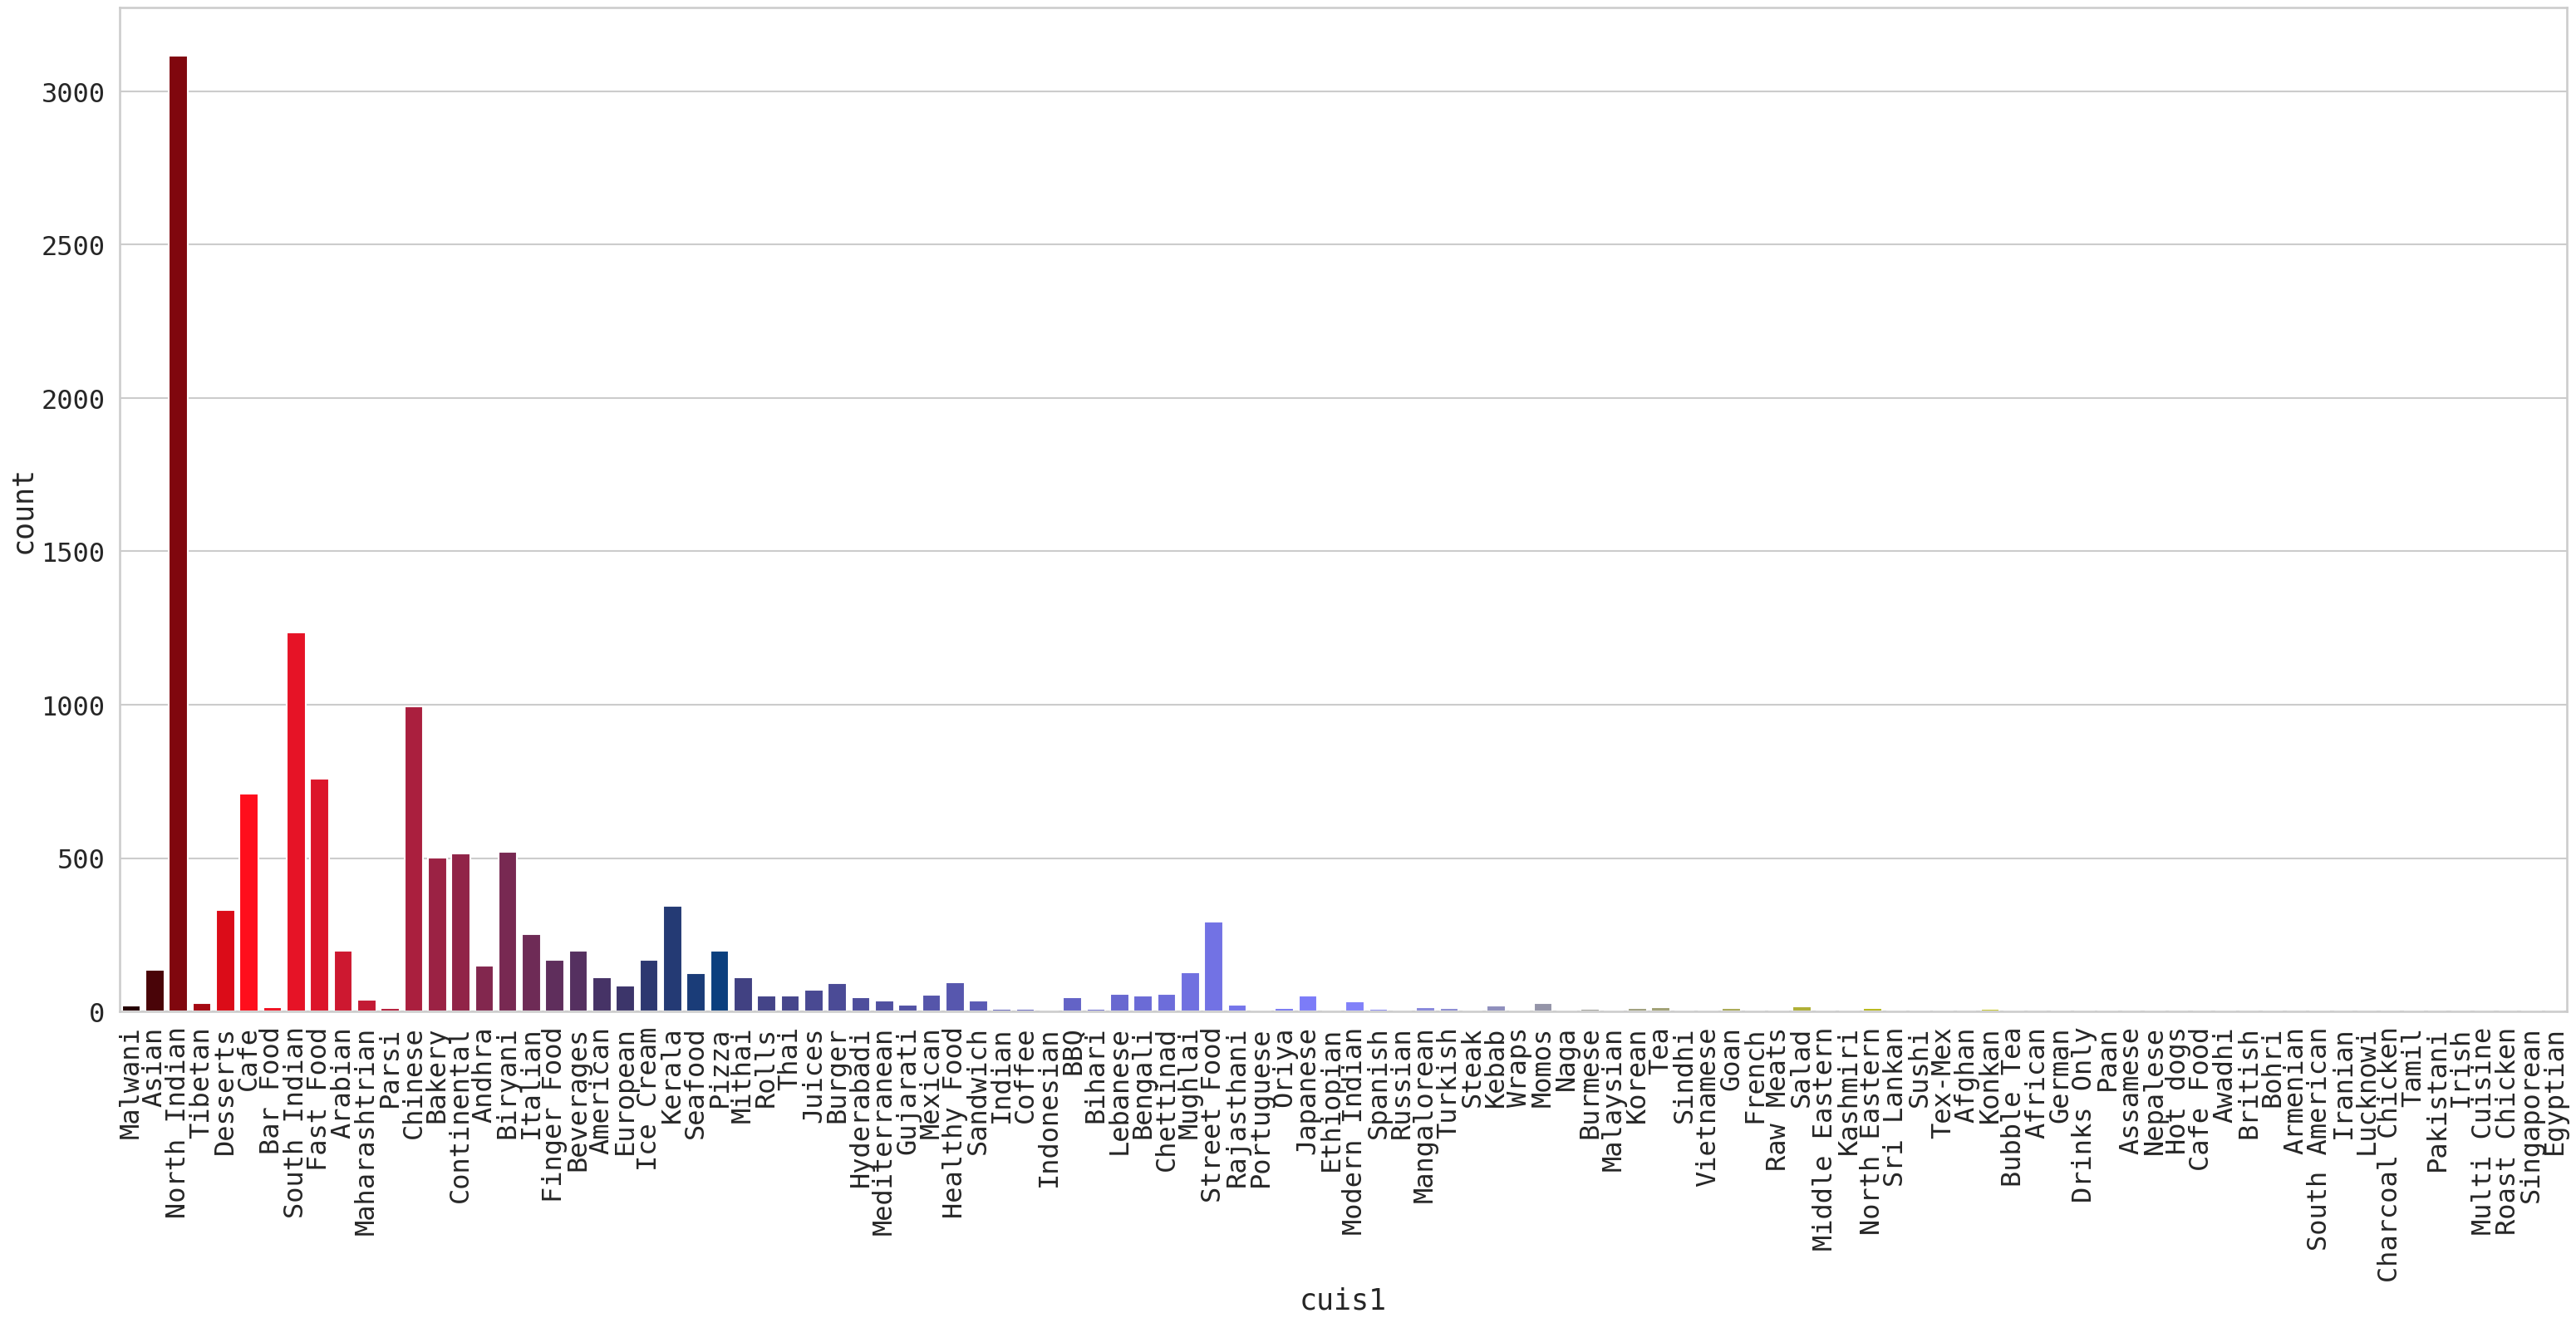

In [62]:
plt.figure(figsize=(38,16),dpi=100)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.4)
m=sns.countplot(x='cuis1',data=train,orient='v',palette='gist_stern',saturation=25)
m.set_xticklabels(m.get_xticklabels(),rotation=90)
plt.show()

                                      MAXIMUM RESTAURANTS SERVES NORTH INDIAN FOOD

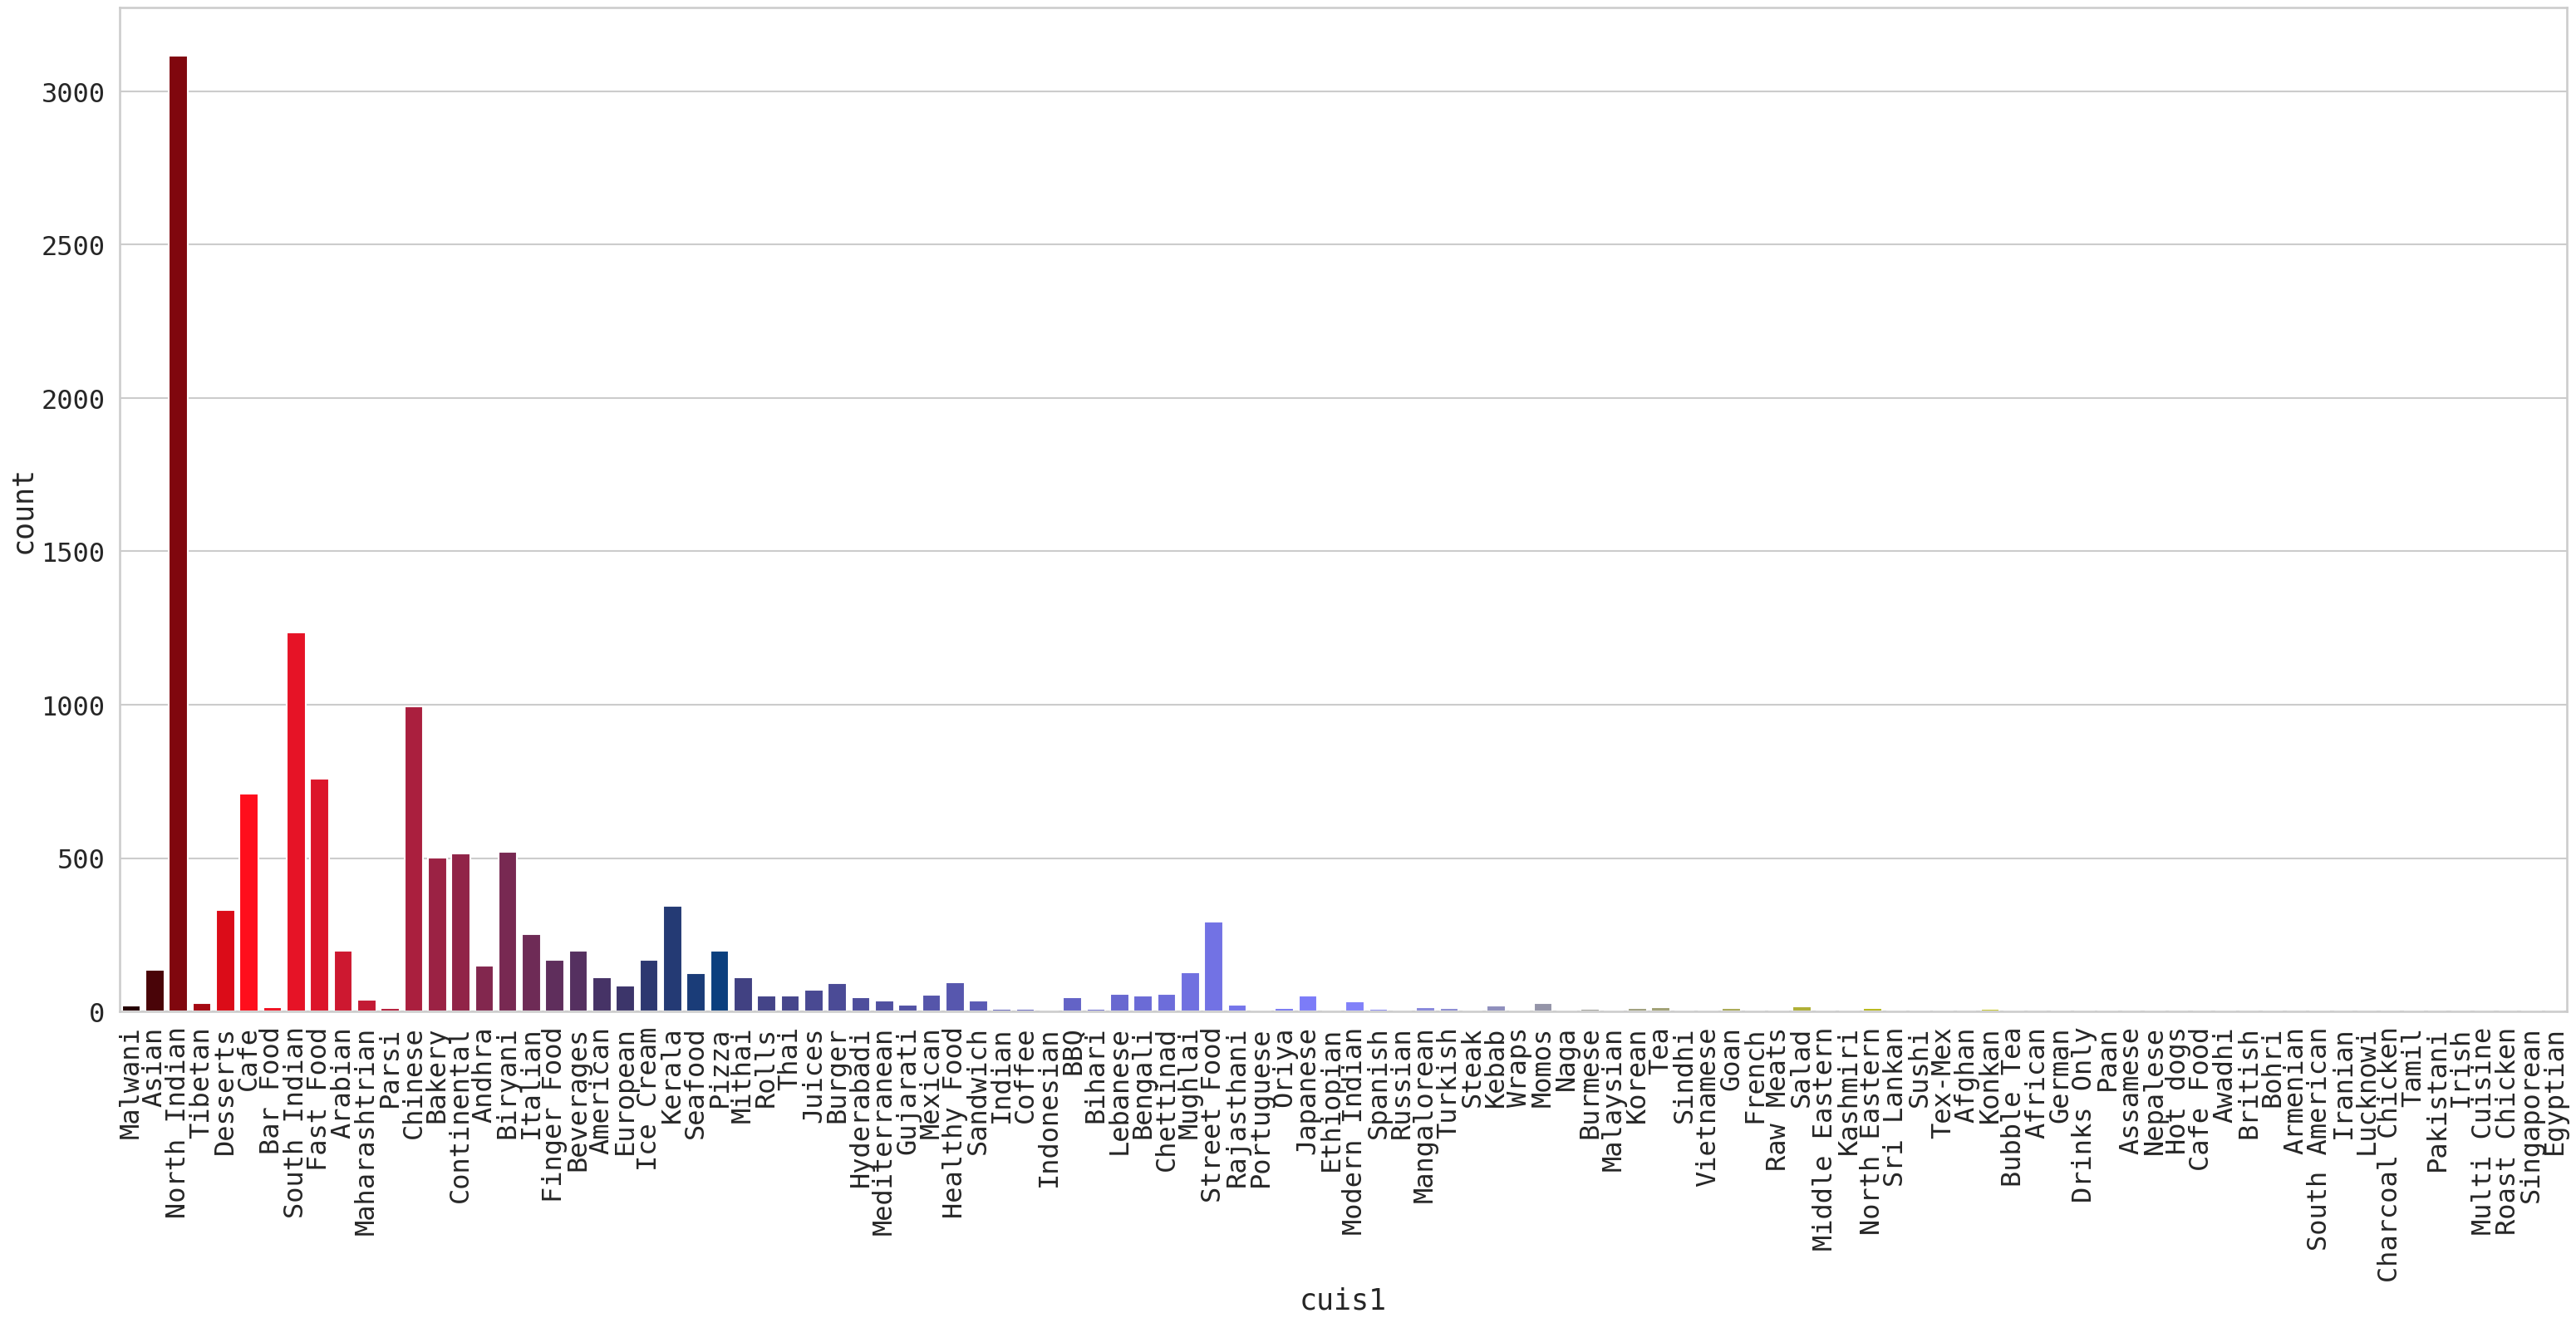

In [63]:
plt.figure(figsize=(38,16),dpi=100)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.4)
m=sns.countplot(x='cuis1',data=train,orient='v',palette='gist_stern',saturation=25)
m.set_xticklabels(m.get_xticklabels(),rotation=90)
plt.show()

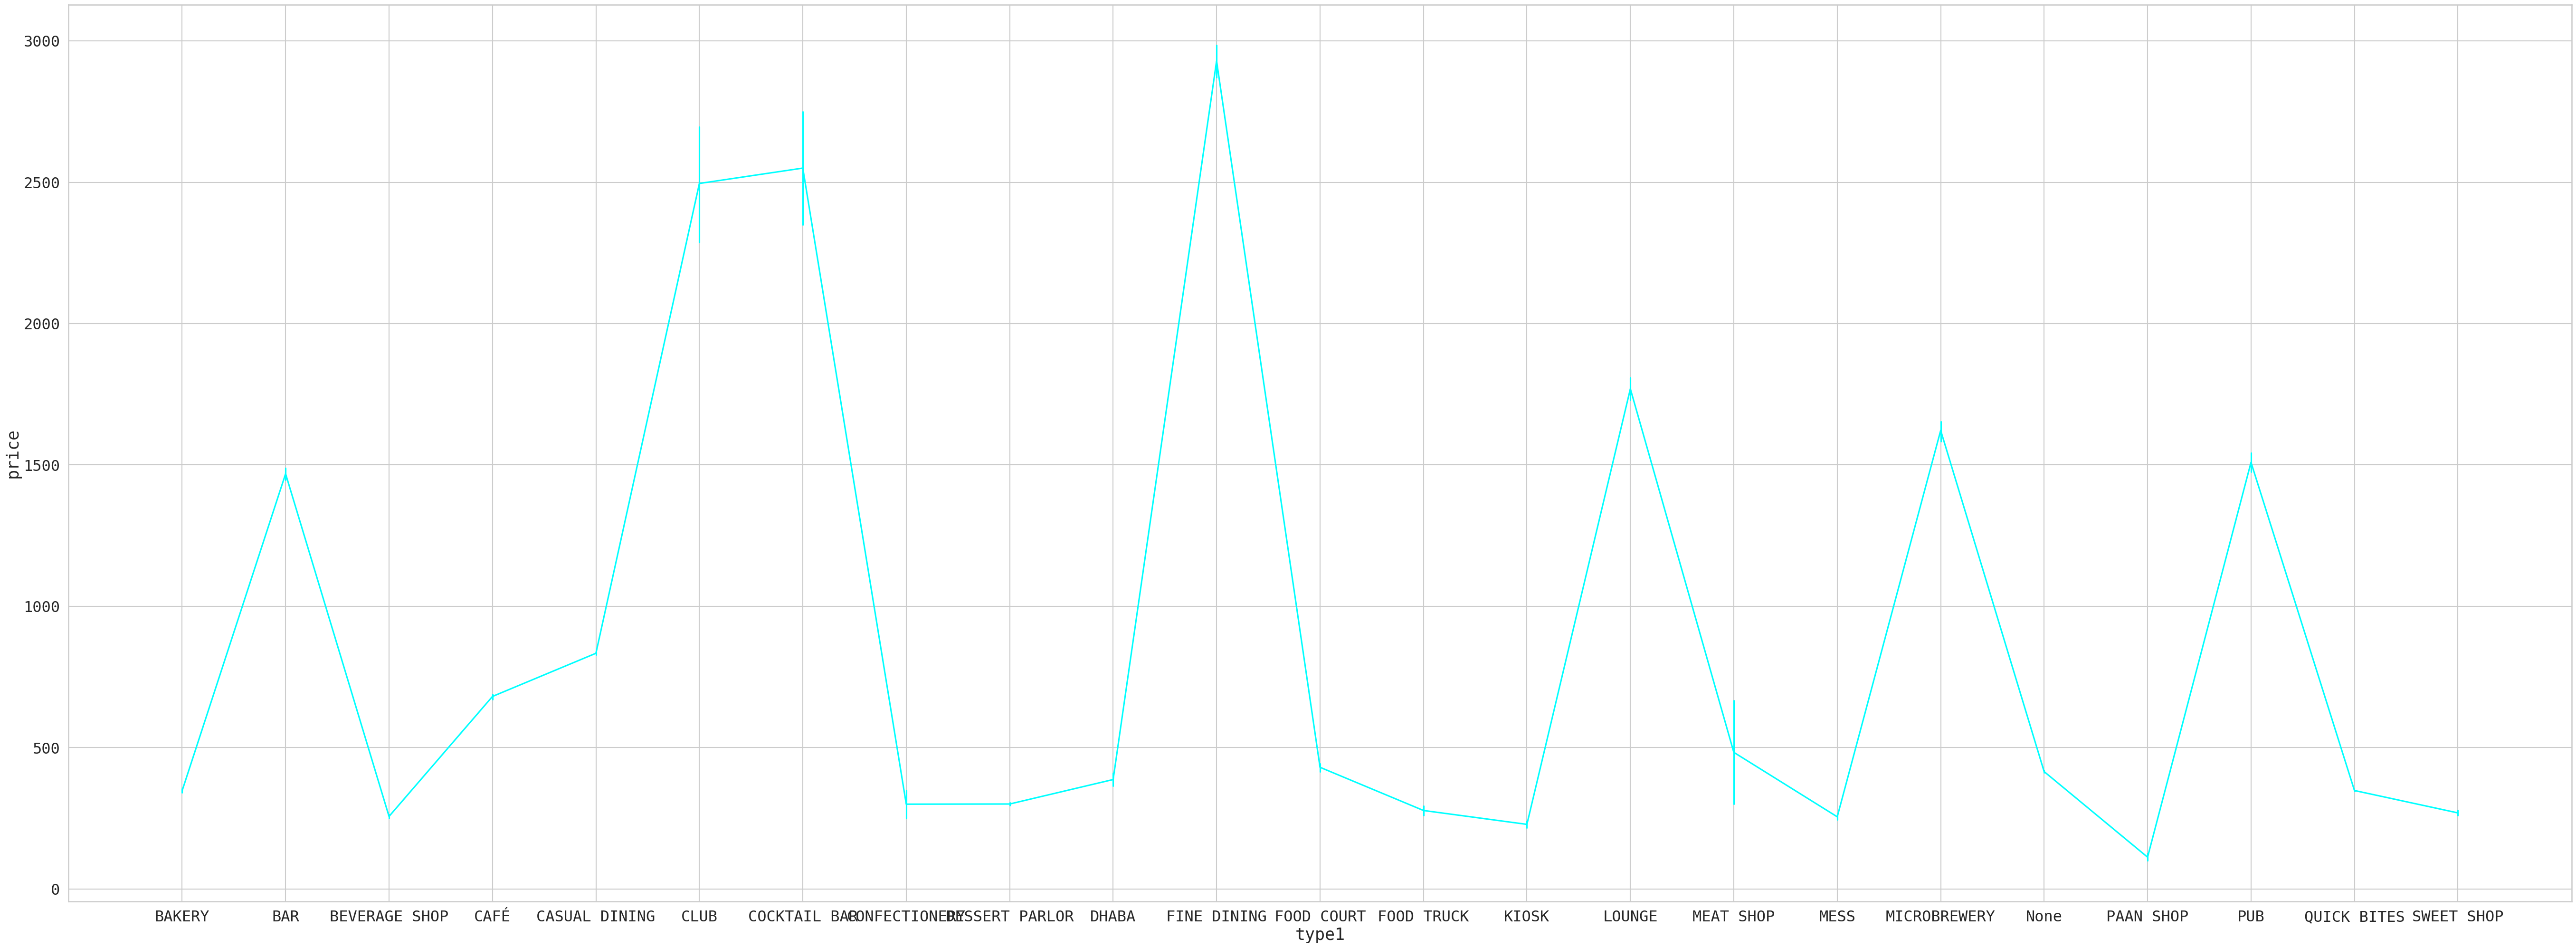

In [64]:
plt.figure(figsize=(68,25),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.4)
sns.lineplot(x="type1", y='price',data=train,color='cyan',dashes=True,estimator='mean',ci=55,sort=True,err_style='bars')
plt.show()

                                THE FOOD PRICE AT FINE DINNING RESTAURANT IS HIGH

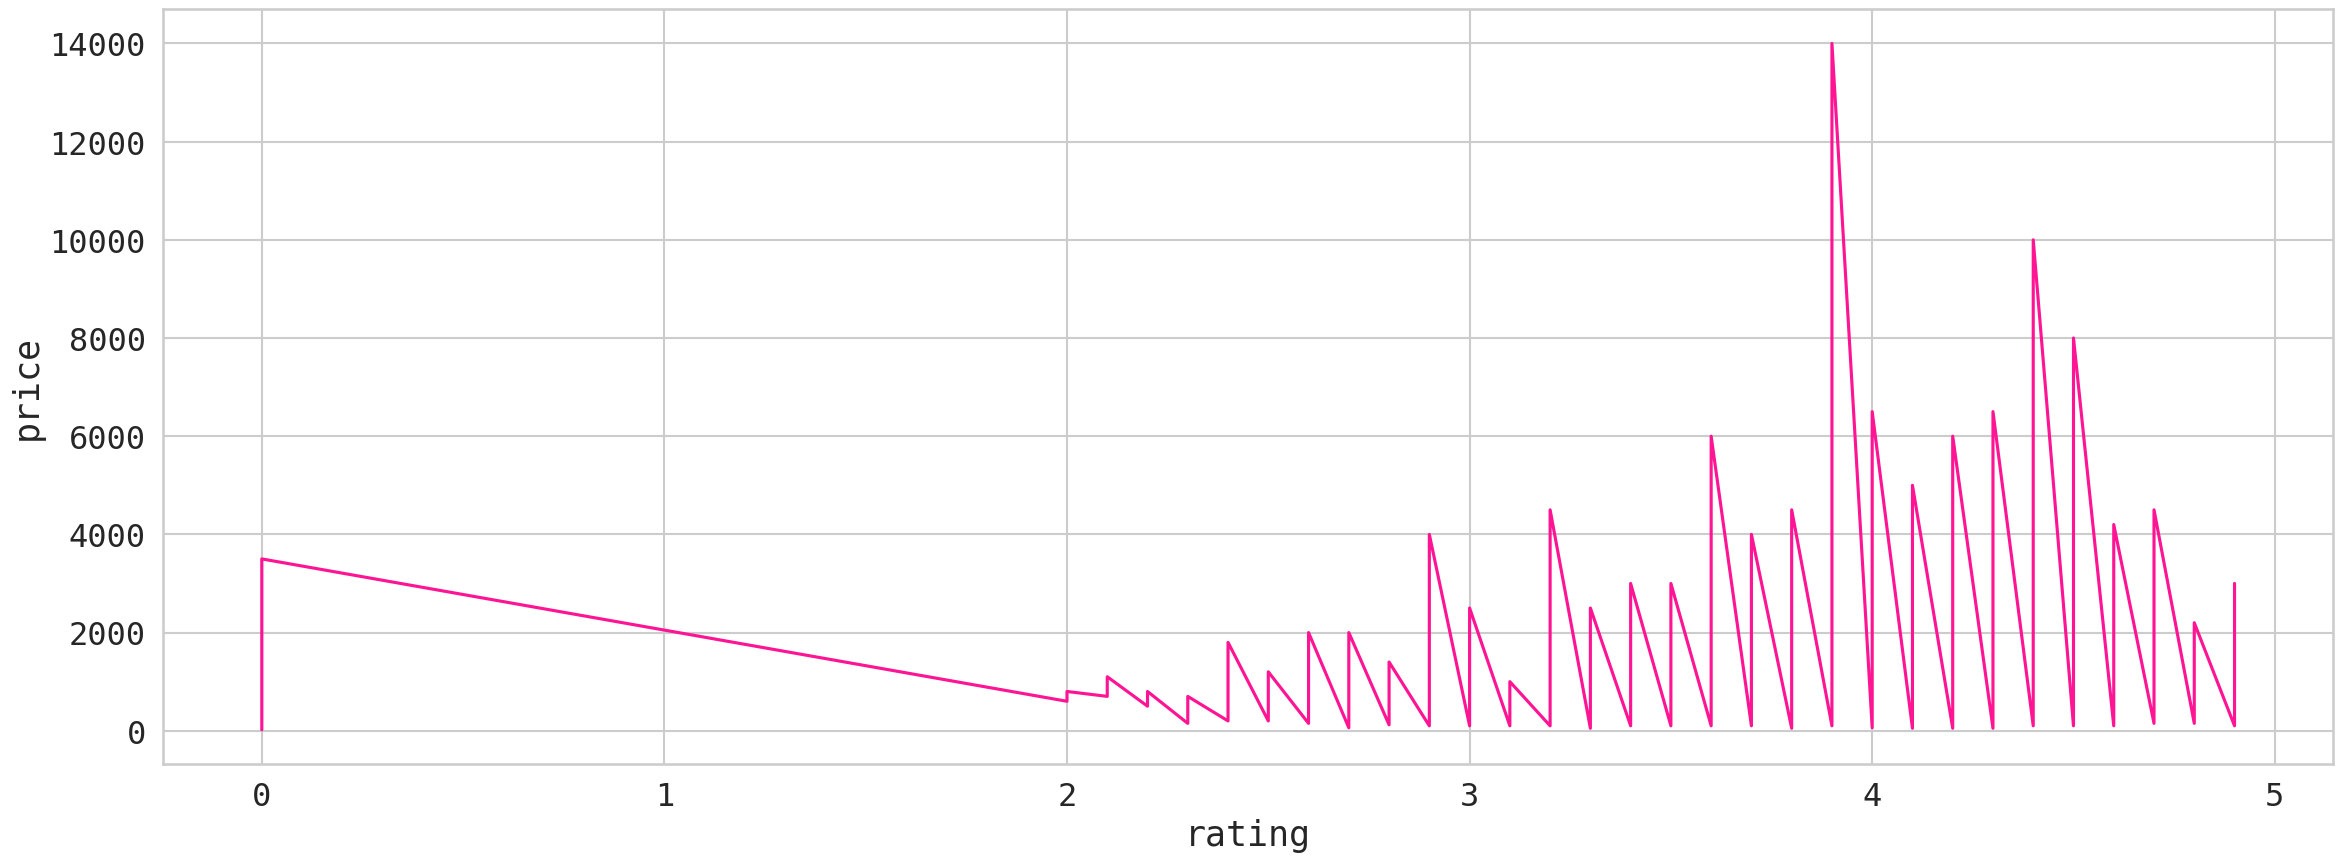

In [65]:
plt.figure(figsize=(28,10),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.4)
sns.lineplot(x="rating", y='price',data=train,color='deeppink',dashes=True,estimator=None,ci=55,sort=True,err_style='bars')
plt.show()

                                RESTAURANT WITH RATING 4 AND ABOVE HAVE HIGH PRICED FOOD

**LabelEncoding the data of object type in train dataset**

In [66]:
for i in train.columns:
    if train[i].dtypes=='object':
        ll=LabelEncoder()
        train[i]=ll.fit_transform(train[i])
train.head(7)

,type1,type2,cuis1,cuis2,cuis3,cuis4,cuis5,cuis6,cuis7,cuis8,locality,city,rating,vote,price
0,4,15,59,32,66,85,78,69,47,19,285,321,3.6,49,1200
1,4,1,6,60,41,85,78,69,47,19,1047,67,4.2,30,1500
2,4,15,72,23,12,32,78,69,47,19,1102,67,3.8,221,800
3,21,15,100,23,93,85,78,69,47,19,136,222,4.1,24,800
4,8,15,28,98,93,85,78,69,47,19,620,222,3.8,165,300
5,4,15,72,23,78,11,78,69,47,19,1361,222,4.0,550,800
6,3,15,21,23,72,61,13,69,47,19,575,37,4.1,509,600


In [67]:
train.dtypes

type1         int32
type2         int32
cuis1         int32
cuis2         int32
cuis3         int32
cuis4         int32
cuis5         int32
cuis6         int32
cuis7         int32
cuis8         int32
locality      int32
city          int32
rating      float64
vote          int64
price         int64
dtype: object

In [68]:
#labelEncoding the data of object type in test dataset

for i in test.columns:
    if test[i].dtypes=='object':
        ll=LabelEncoder()
        test[i]=ll.fit_transform(test[i])
test.head(7)

,type1,type2,cuis1,cuis2,cuis3,cuis4,cuis5,cuis6,cuis7,cuis8,locality,city,rating,vote
0,5,13,60,19,56,33,57,42,34,7,663,111,4.3,564
1,22,13,73,24,61,49,57,42,34,7,221,96,4.2,61
2,5,13,60,69,13,15,57,42,34,7,411,96,3.8,350
3,19,13,12,81,80,68,57,42,34,7,456,41,3.8,1445
4,22,13,73,42,80,68,57,42,34,7,300,78,3.6,23
5,13,6,34,22,80,68,57,42,34,7,77,55,3.7,36
6,5,13,60,72,26,68,57,42,34,7,328,104,0.0,0


In [69]:
test.dtypes

type1         int32
type2         int32
cuis1         int32
cuis2         int32
cuis3         int32
cuis4         int32
cuis5         int32
cuis6         int32
cuis7         int32
cuis8         int32
locality      int32
city          int32
rating      float64
vote          int64
dtype: object

In [70]:
c=train.columns.values
c

array(['type1', 'type2', 'cuis1', 'cuis2', 'cuis3', 'cuis4', 'cuis5',
       'cuis6', 'cuis7', 'cuis8', 'locality', 'city', 'rating', 'vote',
       'price'], dtype=object)

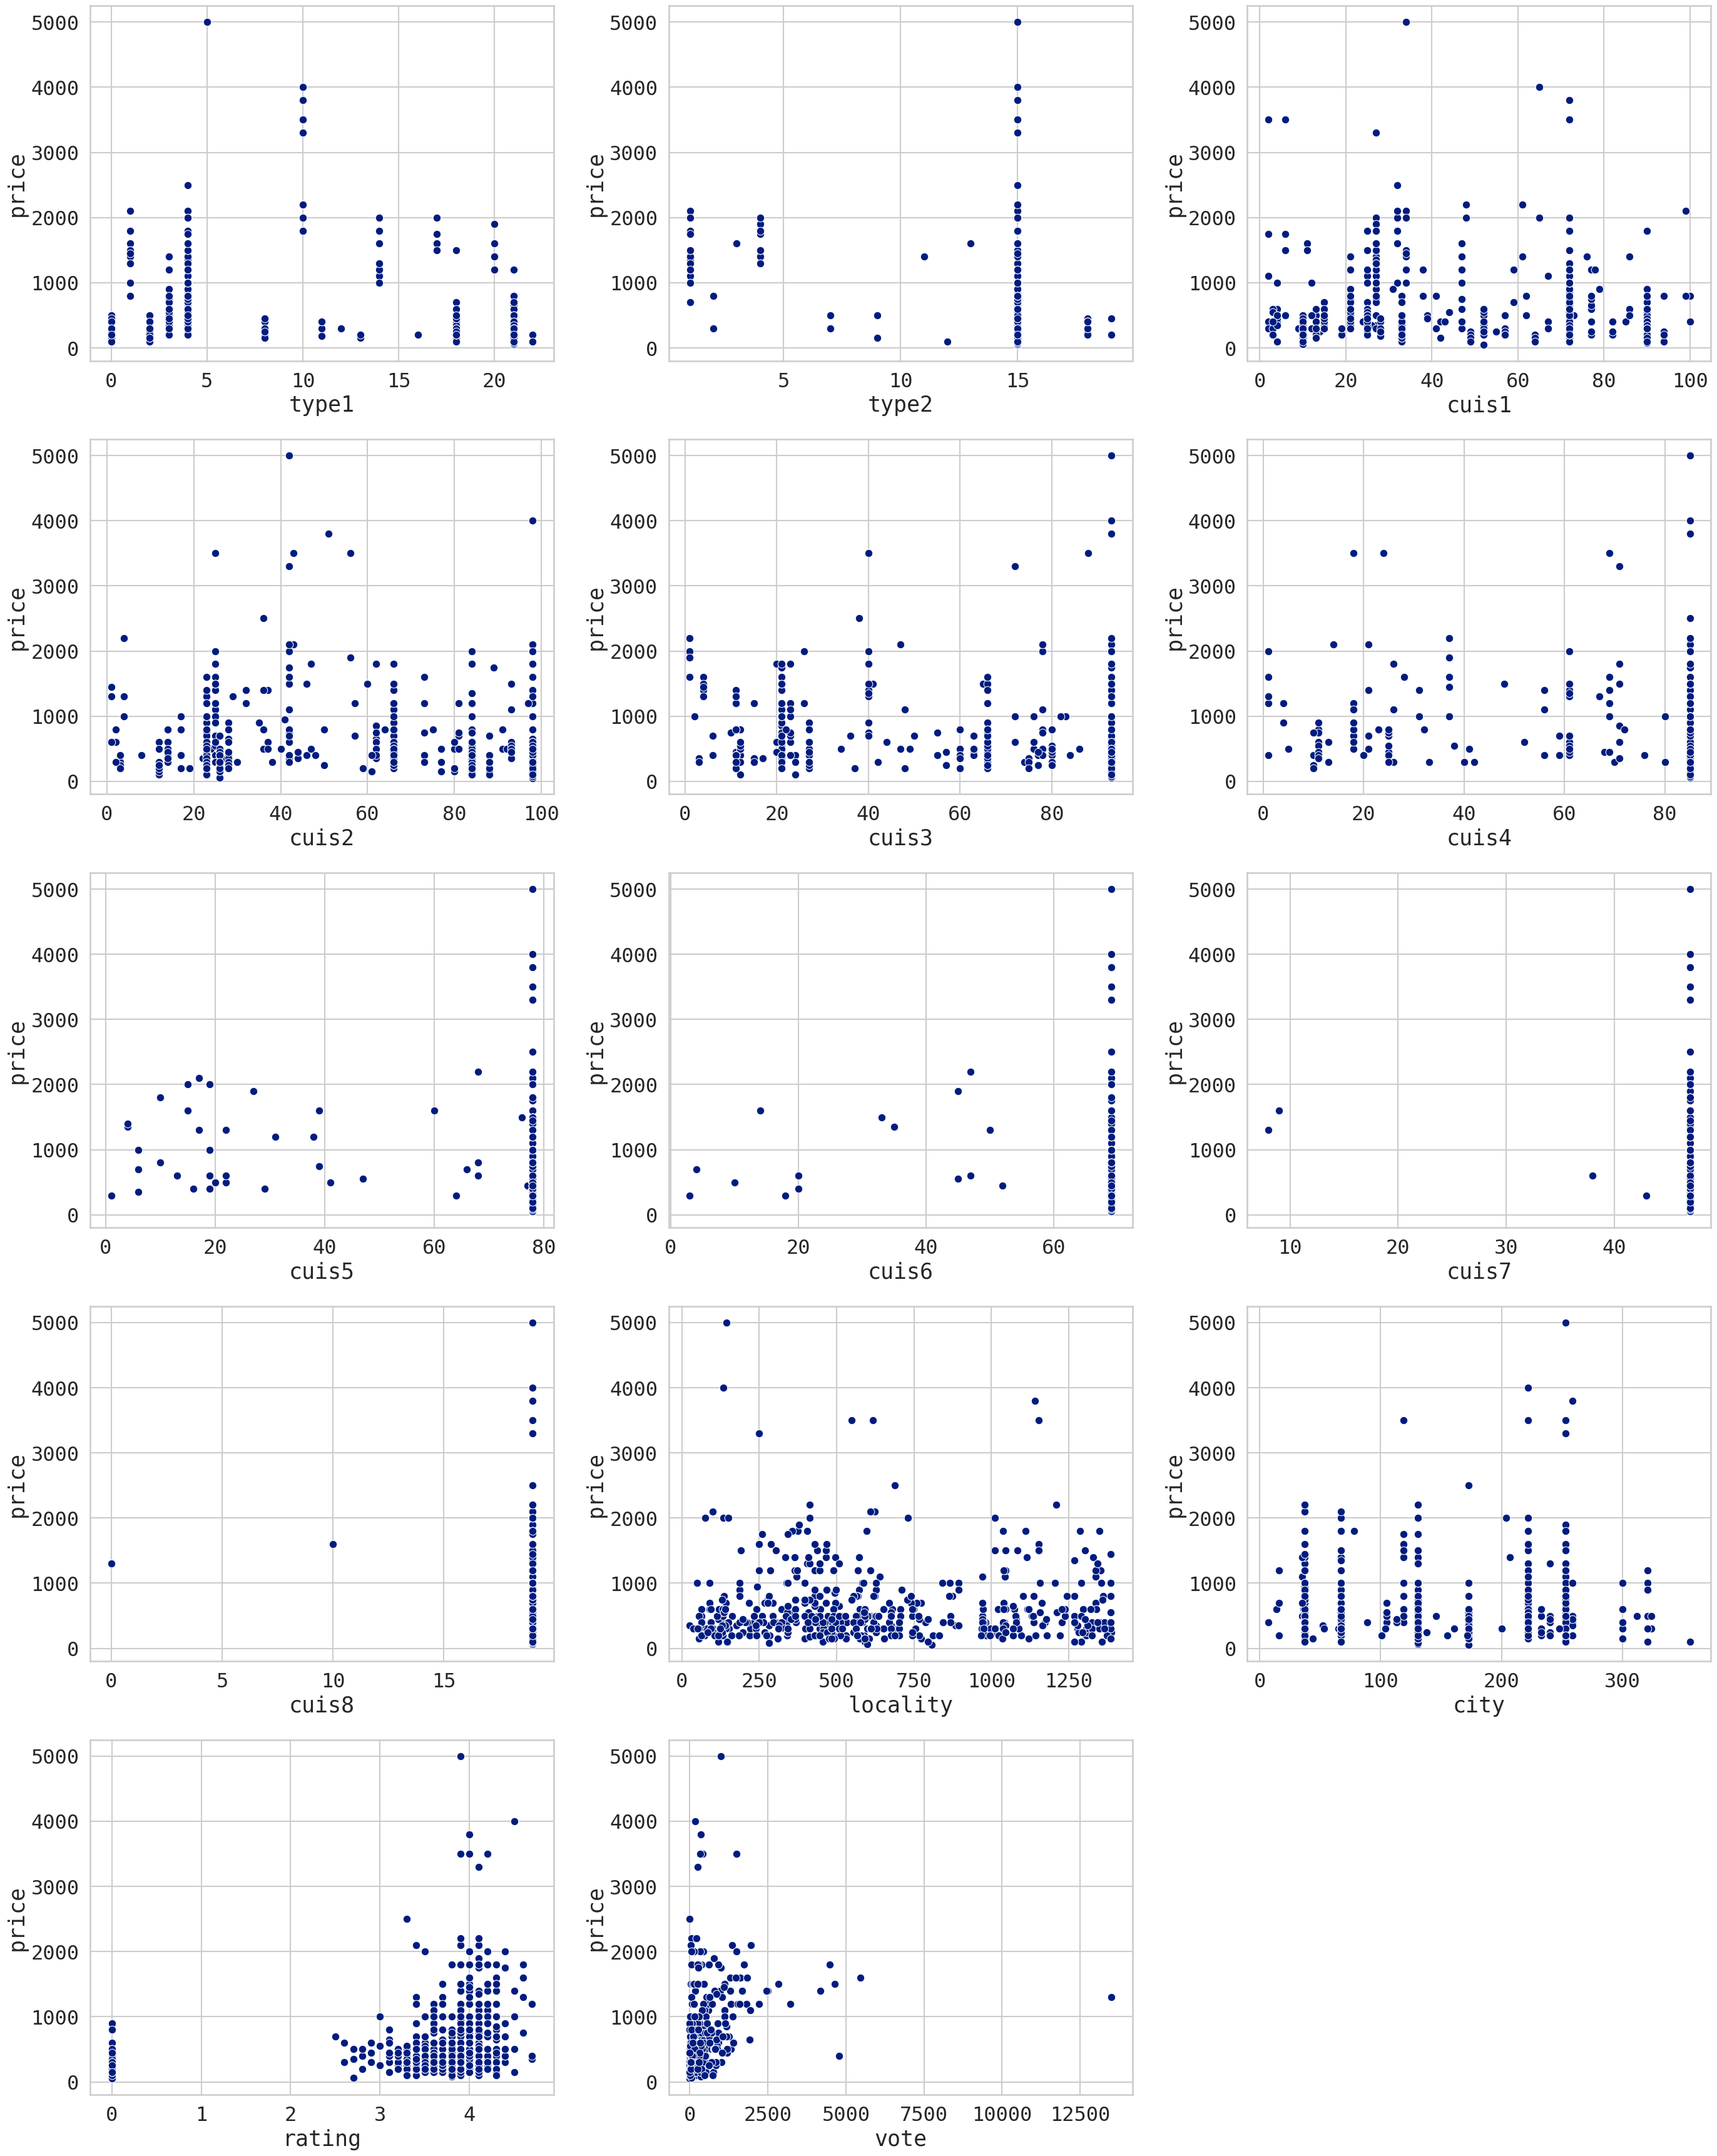

In [71]:
plt.figure(figsize=(28,48),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.4)
for i in range(0,14):
    plt.subplot(7,3,i+1)
    sns.scatterplot(x=(train[c[i]]).head(500),y=train['price'].head(500),markers=True,ci=95,legend='brief')
plt.tight_layout()

**PLOTTING BOXPLOT FOR train TO VISUALIZE OUTLIERS AND REMOVE THEM**

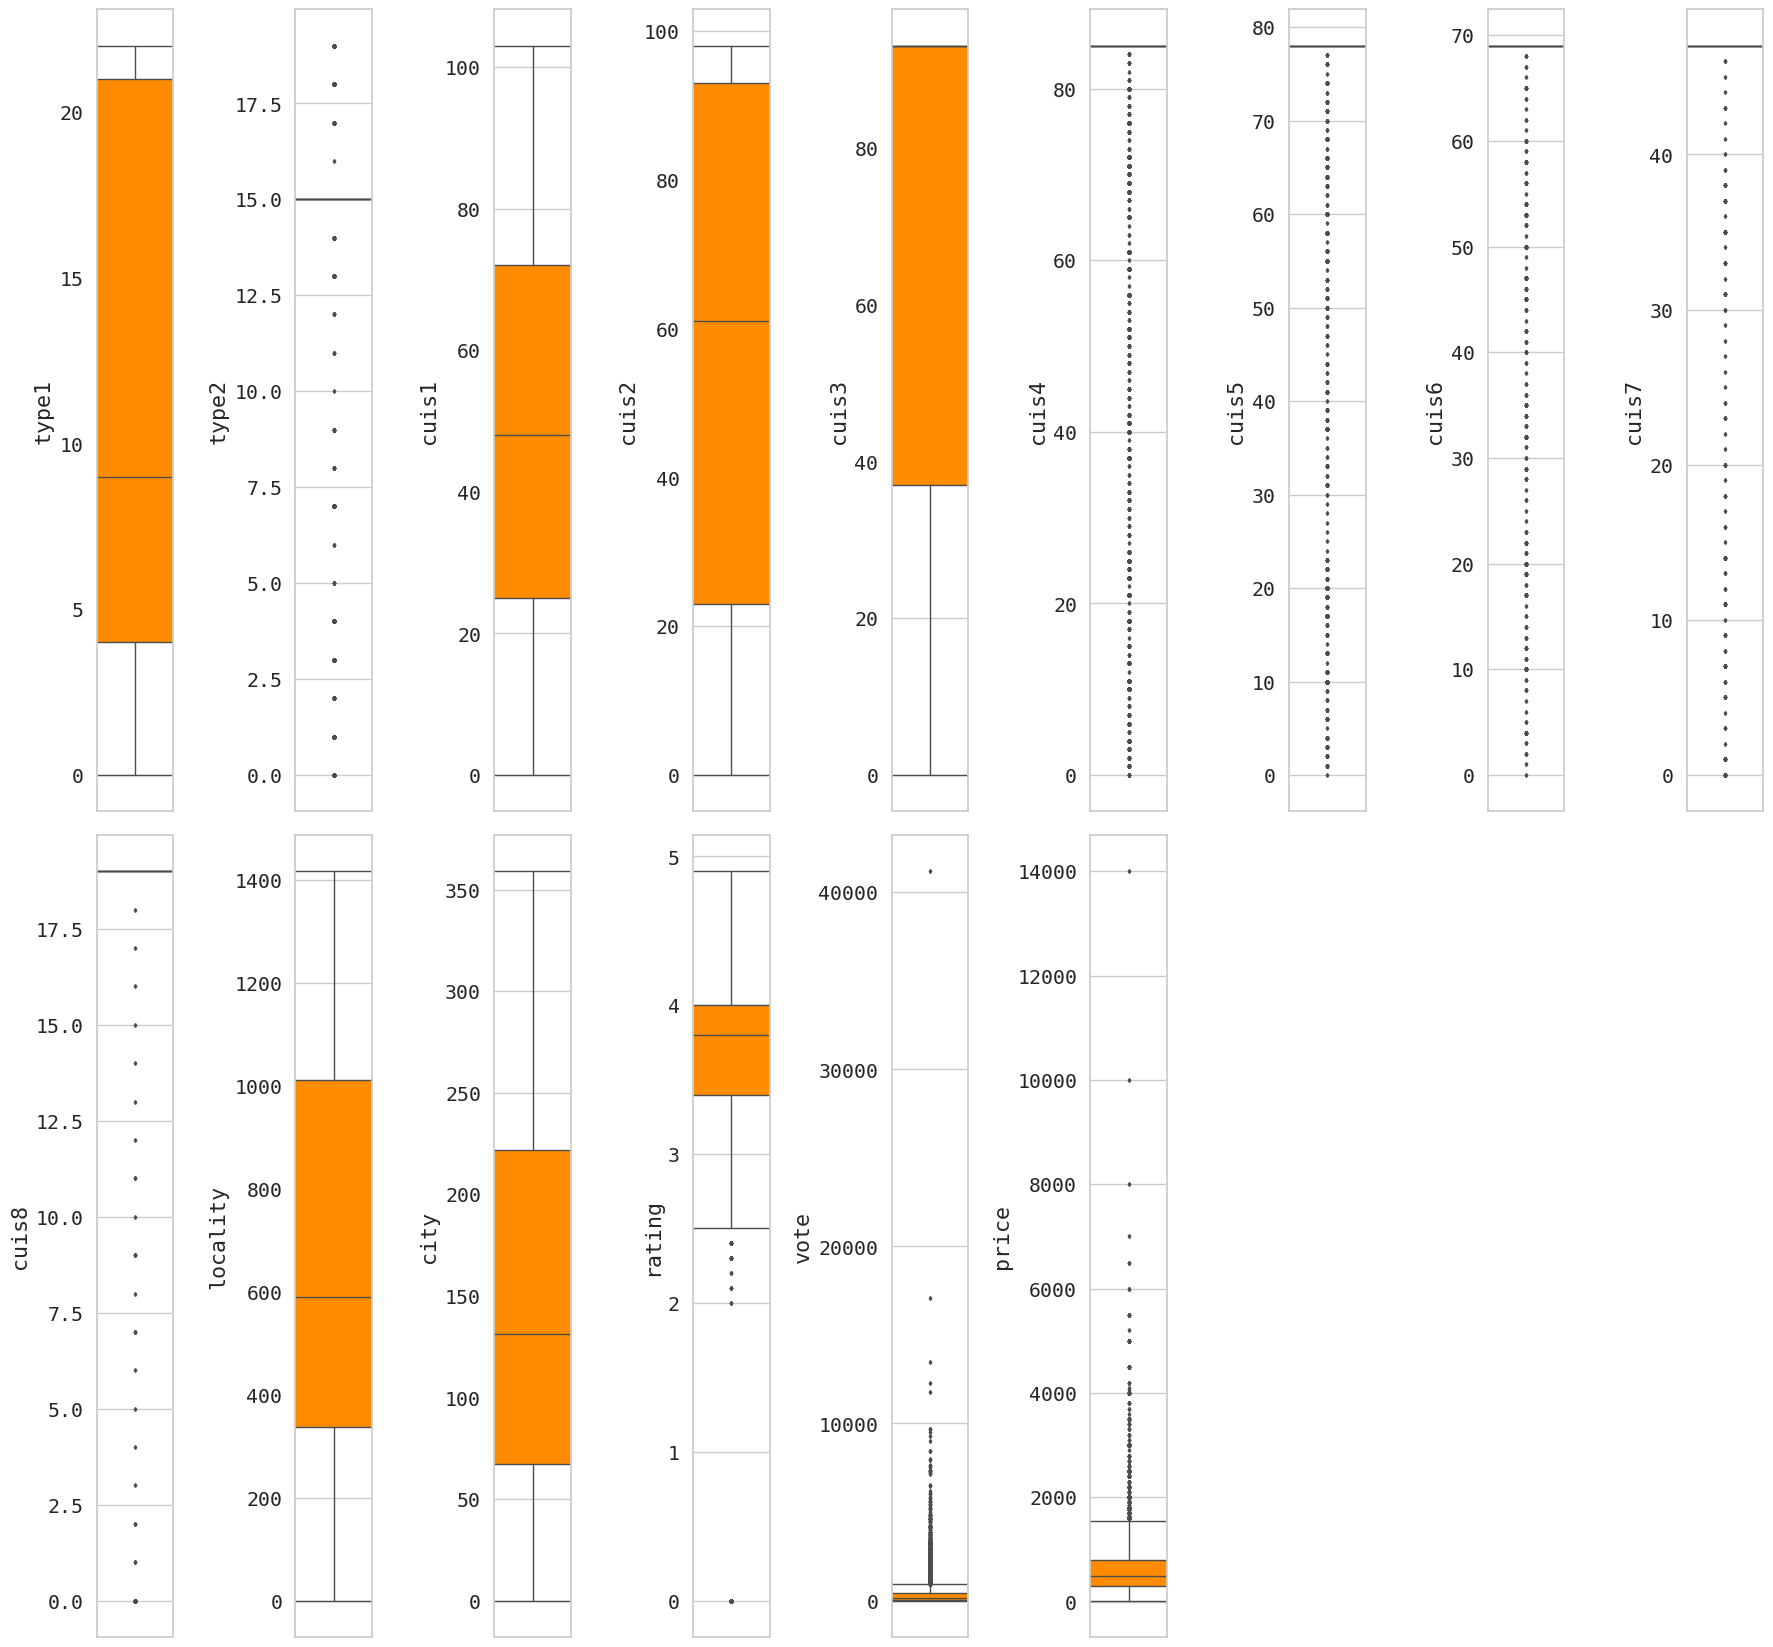

In [72]:
plt.figure(figsize=(18,25),dpi=100)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range(0,len(c)):
    plt.subplot(3,9,i+1)
    sns.boxplot(train[c[i]],orient='v',color='darkorange',saturation=35,width=2.5,linewidth=1,fliersize=2)
plt.tight_layout()

In [73]:
zsc=np.abs(zscore(train))
zsc

array([[0.92110764, 0.26906755, 0.34112967, ..., 0.14046388, 0.40409368,
        0.86557436],
       [0.92110764, 3.75738167, 1.51957003, ..., 0.65465896, 0.42748121,
        1.34341885],
       [0.92110764, 0.26906755, 0.79752771, ..., 0.31186224, 0.19237504,
        0.22844838],
       ...,
       [0.29487922, 0.26906755, 0.53655887, ..., 0.4832606 , 0.28399192,
        1.02485586],
       [0.92110764, 0.26906755, 0.79752771, ..., 0.05476469, 0.42501936,
        0.4086776 ],
       [0.92110764, 0.26906755, 0.79752771, ..., 0.03093449, 0.36892556,
        0.09011461]])

In [74]:
print(np.where(zsc>3))

(array([    1,     6,    11, ..., 12608, 12614, 12626], dtype=int64), array([ 1,  6,  1, ..., 14,  1,  1], dtype=int64))


In [75]:
Train=train[(zsc<3).all(axis=1)]

In [76]:
print('With outler the shape=',train.shape,'\nAfter outlier removal shape=',Train.shape,'\nTotal row removed=',len(train)-len(Train))

With outler the shape= (12630, 15) 
After outlier removal shape= (10987, 15) 
Total row removed= 1643


**plotting distplot to visualize the spread of Train**

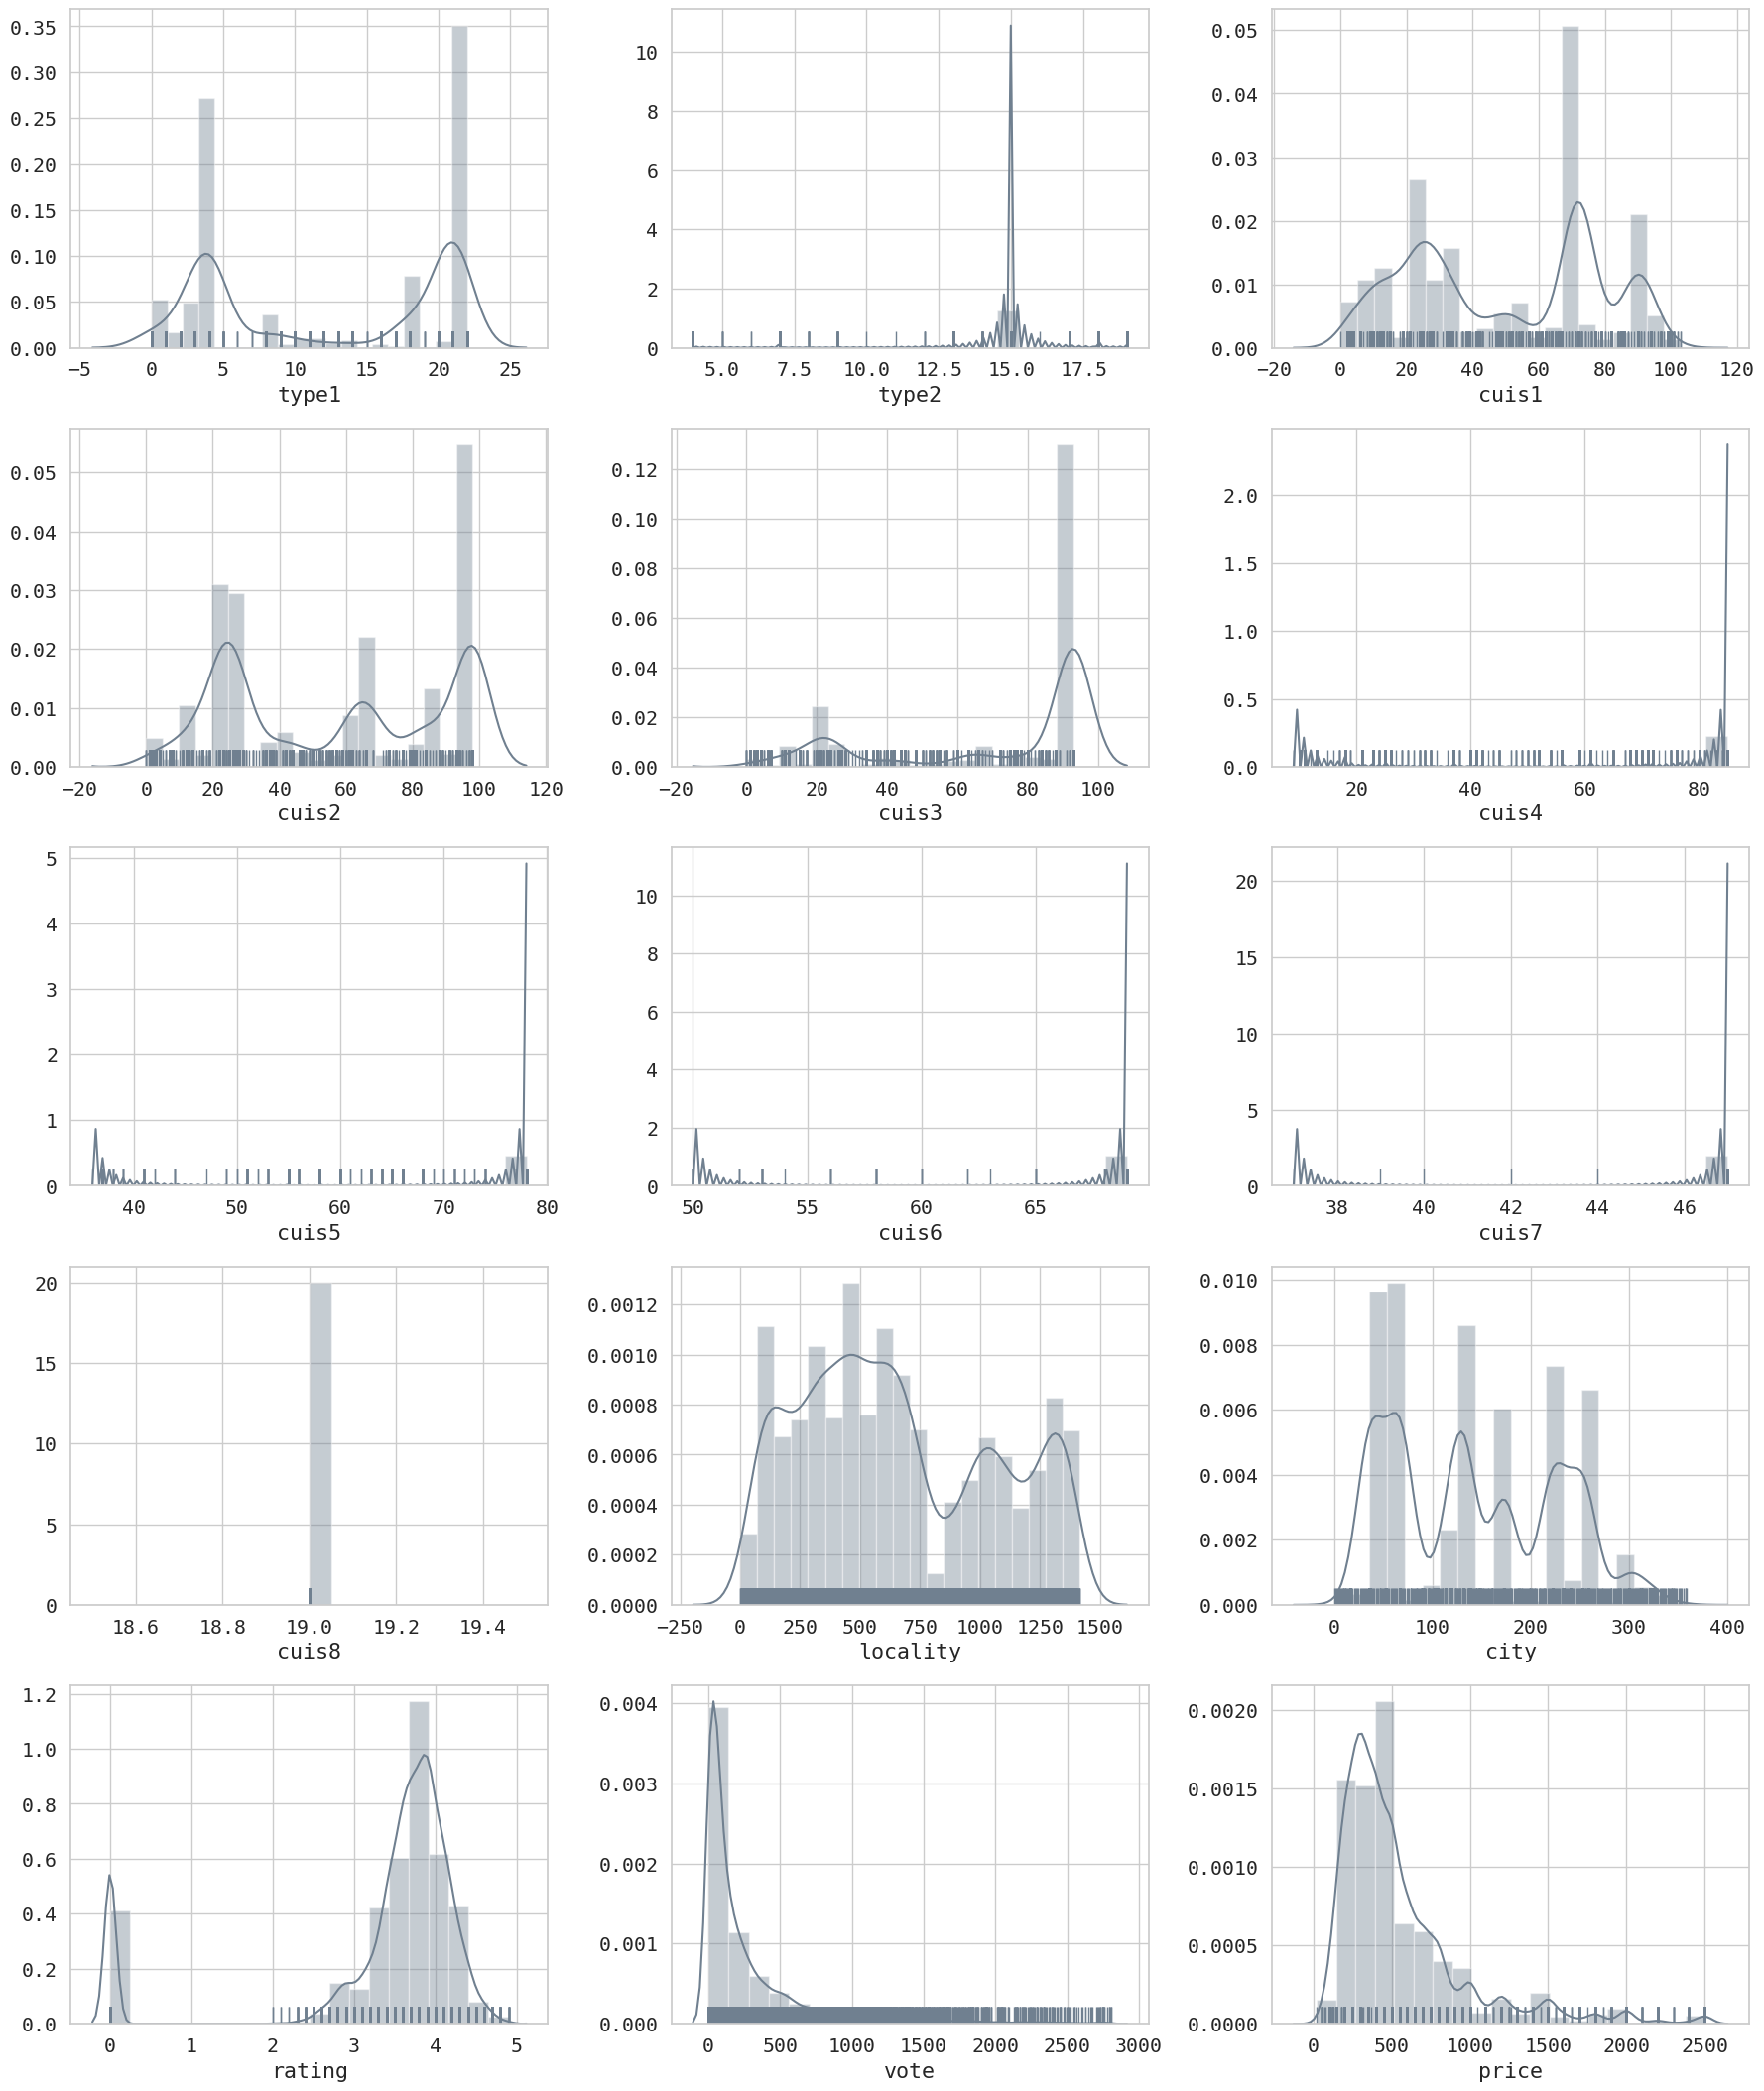

In [77]:

cl=Train.columns.values
plt.figure(figsize=(18,25),dpi=100)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range(0,len(cl)):
    plt.subplot(6,3,i+1)
    sns.distplot(Train[cl[i]],color='slategrey',bins=20,rug=True,kde=True,hist=True)
plt.tight_layout()

**A skew value more than +0.55 is called as positive skew/rightskew/left_tailed_skew and skew value less than -0.55 is called as negative_skew/left skew/right tailed skew and it must be corrected**



In [78]:
Train.skew()

type1       -0.055950
type2       -4.637084
cuis1       -0.014235
cuis2        0.000143
cuis3       -0.998387
cuis4       -2.744243
cuis5       -8.352203
cuis6      -19.415062
cuis7      -54.172706
cuis8        0.000000
locality     0.322681
city         0.278173
rating      -2.150522
vote         2.744521
price        2.065899
dtype: float64

**Removing skew if any**


In [79]:
for i in Train.columns:
    if Train.skew().loc[i]>0.55:
        Train[i]=np.log1p(Train[i])
    if Train.skew().loc[i]< -0.55:
        Train[i]=np.square(Train[i])

In [80]:
test.skew()

type1        0.081202
type2       -3.228793
cuis1       -0.047203
cuis2        0.027762
cuis3       -0.864800
cuis4       -2.069503
cuis5       -3.983673
cuis6       -6.711719
cuis7       -9.136592
cuis8      -12.133963
locality     0.299213
city         0.075107
rating      -2.245006
vote         7.037917
dtype: float64

In [81]:
#removing skew if any
for i in test.columns:
    if test.skew().loc[i]>0.55:
        test[i]=np.log1p(Train[i])
    if test.skew().loc[i]< -0.55:
        test[i]=np.square(test[i])

<Figure size 1440x360 with 0 Axes>

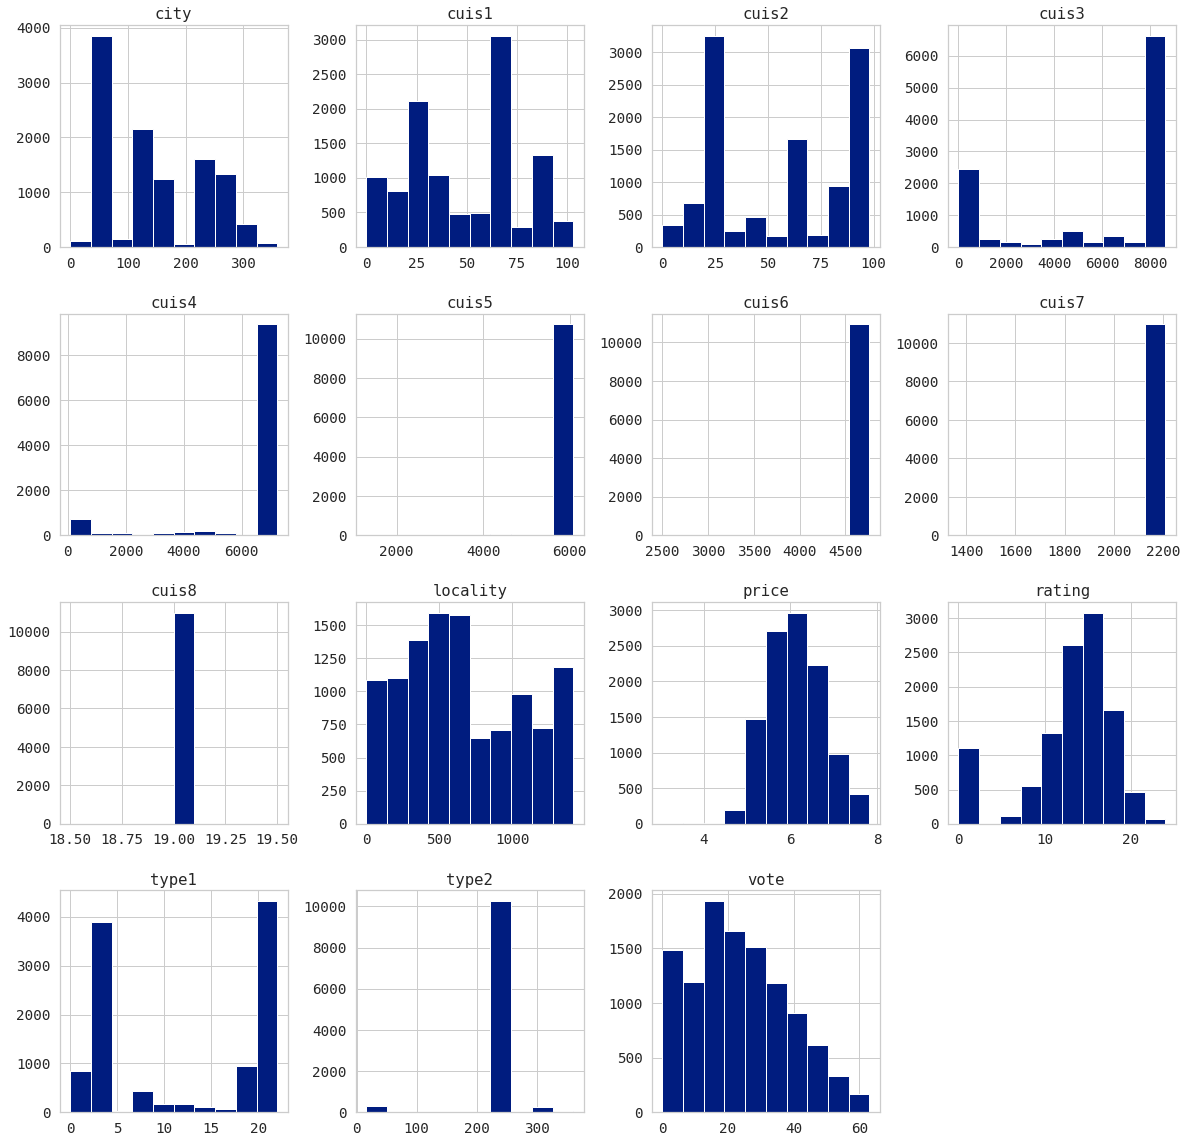

In [82]:
sns.set_context('talk',font_scale=1.9)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
plt.figure(figsize=(12,3),dpi=120)
Train.hist(figsize=(20,20),grid=True)
plt.show()

*Importing important libraries for modelling*

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV as rsv, cross_val_score as cvs
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

import joblib

import warnings
warnings.filterwarnings('ignore')



In [84]:
Train.head(4)

,type1,type2,cuis1,cuis2,cuis3,cuis4,cuis5,cuis6,cuis7,cuis8,locality,city,rating,vote,price
0,4,225,59,32,4356,7225,6084,4761,2209,19,285,321,12.96,15.303924,7.090910
2,4,225,72,23,144,1024,6084,4761,2209,19,1102,67,14.44,29.188923,6.685861
3,21,225,100,23,8649,7225,6084,4761,2209,19,136,222,16.81,10.361162,6.685861
4,8,225,28,98,8649,7225,6084,4761,2209,19,620,222,14.44,26.132419,5.707110


In [85]:
x=Train.drop(['price'],axis=1)
y=Train['price']

*using standard scaler on x to scale the values*

In [86]:
ss=StandardScaler()
x=ss.fit_transform(x)

*converting y interm of np.array and reshaping in form of many rows and one column*

In [87]:
y=np.array(y)
y=y.reshape(-1,1)

In [88]:
print('Shape of x=', x.shape,'\nShape of y=',y.shape)

Shape of x= (10987, 14) 
Shape of y= (10987, 1)


*creating a function to get the best random state for a model to get optimum performing model*

In [89]:
def model(mod,x,y):
    r2=0
    for i in range(27,220):
        x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > r2:
            r2=r2score
            random_state=i
    print('In this', mod,'model',
          '\n Random State= ',random_state, 
          '\n r2 score = ',r2score,
          '\n mean abs error value (MAE)= ', MAE,
          '\n mean squared error value (MSE)= ',MSE,
          '\n & root mean sq error (RMSE)= ', RMSE )  

**LINEAR REGRESSION**

In [90]:
lreg=LinearRegression()
model(lreg,x,y)

In this LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) model 
 Random State=  61 
 r2 score =  0.3581951941163729 
 mean abs error value (MAE)=  0.3948895472712567 
 mean squared error value (MSE)=  0.2687085168660239 
 & root mean sq error (RMSE)=  0.5183710224019317


*CHECKING FOR OVER/UNDER FITTING*

In [91]:
lireg_scr=cvs(lreg,x,y,cv=50,scoring='r2')
print('the R2 score at liner regression model is=',lireg_scr.mean())

the R2 score at liner regression model is= 0.34076449302613454


**LASSO REGRESSION**

*Checking for best parameters for Lasso using RandomizedSearchCV*

In [92]:
lso=Lasso()
lso_para={'alpha':(0.01,0.1,1.0,10,0.001),'max_iter':(20,40,50,90,150)}
lso_rsv=rsv(lso,lso_para,cv=60,n_iter=50)
lso_rsv.fit(x,y)
print(lso_rsv)
print('\nbest_score=',lso_rsv.best_score_)
print('\nbest_parameters=',lso_rsv.best_params_)

RandomizedSearchCV(cv=60, error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'alpha': (0.01, 0.1, 1.0, 10, 0.001),
                                        'max_iter': (20, 40, 50, 90, 150)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best_score= 0.34134519812897823

best_parameters= {'max_iter': 20, 'alpha': 0.001}


In [93]:
lso=Lasso(alpha=0.001,max_iter=20)
model(lso,x,y)

In this Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=20,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) model 
 Random State=  61 
 r2 score =  0.3581224712592166 
 mean abs error value (MAE)=  0.3948439847491734 
 mean squared error value (MSE)=  0.2687389642090628 
 & root mean sq error (RMSE)=  0.5184003898619896


*CHECKING FOR OVER/UNDER FITTING*

In [94]:
lso_scr=cvs(lso,x,y,cv=50,scoring='r2')
print('the R2 score at LASSO model is=',lso_scr.mean())

the R2 score at LASSO model is= 0.34077306352987013


**RIDGE REGRESSION**

*checking for best parameters for Ridge using RandomizedSearchCV*

In [95]:
rid=Ridge()
rid_para={'alpha':(0.001,0.01,0.1,1.0,10,12),'max_iter':(20,40,50,90,150)}
rid_rsv=rsv(rid,rid_para,cv=50,n_iter=60)
rid_rsv.fit(x,y)
print(rid_rsv)
print('\nbest_score=',rid_rsv.best_score_)
print('\nbest_parameters=',rid_rsv.best_params_)

RandomizedSearchCV(cv=50, error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=60, n_jobs=None,
                   param_distributions={'alpha': (0.001, 0.01, 0.1, 1.0, 10,
                                                  12),
                                        'max_iter': (20, 40, 50, 90, 150)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best_score= 0.34075379840570613

best_parameters= {'max_iter': 20, 'alpha': 12}


In [96]:
rid=Ridge(alpha=15,max_iter=20)
model(rid,x,y)

In this Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=20, normalize=False,
      random_state=None, solver='auto', tol=0.001) model 
 Random State=  61 
 r2 score =  0.35815838443841697 
 mean abs error value (MAE)=  0.39489333368674534 
 mean squared error value (MSE)=  0.26872392820897306 
 & root mean sq error (RMSE)=  0.5183858873551372


In [97]:
rid_scr=cvs(rid,x,y,cv=50,scoring='r2')
print('the R2 score at RIDGE model is=',rid_scr.mean())

the R2 score at RIDGE model is= 0.34076980811746826


**ELASTIC NET**

*checking for best parameters for ELASTIC_NET using RandomizedSearchCV*

In [98]:
els=ElasticNet()
els_para={'alpha':(0.001,0.01,0.1,1.0,10,12),'max_iter':(20,40,50,90,150),'warm_start':(False,True)}
els_rsv=rsv(els,els_para,cv=60,n_iter=50)
els_rsv.fit(x,y)
print(els_rsv)
print('best_score=',els_rsv.best_score_)
print('best_parameters=',els_rsv.best_params_)

RandomizedSearchCV(cv=60, error_score='raise-deprecating',
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'alpha': (0.001, 0.01, 0.1, 1.0, 10,
                                                  12),
                                        'max_iter': (20, 40, 50, 90, 150),
                                        'warm_start': (False, True)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
best_score= 0.3413421781186026

In [99]:
els=ElasticNet(max_iter=20,alpha=0.001,warm_start=False)
model(els,x,y)

In this ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=20, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) model 
 Random State=  61 
 r2 score =  0.35815367108200136 
 mean abs error value (MAE)=  0.3948677381191208 
 mean squared error value (MSE)=  0.2687259015800047 
 & root mean sq error (RMSE)=  0.5183877907320008


*CHECKING FOR OVER/UNDER FITTING*

In [100]:
els_scr=cvs(els,x,y,cv=40,scoring='r2')
print('the R2 score at ELASTIC NET model is=',els_scr.mean())

the R2 score at ELASTIC NET model is= 0.34142314190528145


**DECISION TREE REGRESSOR**

*HYPERPARAMETER TUNING WITH RANDOMIZED_SEARCH_CV*

In [101]:
dtr=DecisionTreeRegressor()
dpara={'criterion':('mse','mae','friedman_mse'),'splitter':('best','random'),'max_depth':range(1,8),
    'min_samples_split':range(3,9)}
dtr_rsv=rsv(dtr,dpara,cv=80,n_iter=40)
dtr_rsv.fit(x,y)
print(dtr_rsv)
print(dtr_rsv.best_score_)
print(dtr_rsv.best_params_)

RandomizedSearchCV(cv=80, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=40, n_jobs=None,
                   param_d

In [102]:
dtr=DecisionTreeRegressor(criterion='mse',max_depth=9,min_samples_split=4,splitter='best')
model(dtr,x,y)

In this DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') model 
 Random State=  78 
 r2 score =  0.5626965651654715 
 mean abs error value (MAE)=  0.32805035321659803 
 mean squared error value (MSE)=  0.183088621832649 
 & root mean sq error (RMSE)=  0.4278885623998952


In [103]:
dtr_scr=cvs(dtr,x,y,cv=45,scoring='r2')
print('the R2 score at  DTR model is=',dtr_scr.mean())

the R2 score at  DTR model is= 0.5521455616908656


**SUPPORT VECTOR REGRESSOR**

In [104]:
svr=SVR()
svr_para={'kernel':('poly','rbf','linear'),'gamma':(0.001,0.01)}
svr_rsv=rsv(svr,svr_para,cv=20,n_iter=40,)
svr_rsv.fit(x,y)
svr_rsv.best_score_
svr_rsv.best_params_

{'kernel': 'rbf', 'gamma': 0.01}

In [105]:
svr=SVR(kernel='rbf',gamma=0.1,C=8)
model(svr,x,y)

In this SVR(C=8, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) model 
 Random State=  198 
 r2 score =  0.42268747810014984 
 mean abs error value (MAE)=  0.3700902090342784 
 mean squared error value (MSE)=  0.24170712046057952 
 & root mean sq error (RMSE)=  0.49163718376520255


In [106]:
svr_scr=cvs(svr,x,y,cv=40,scoring='r2')
print('the R2 score at SVR model is=',svr_scr.mean())

the R2 score at SVR model is= 0.4312180602900882


**K_NEIGHBORS REGRESSOR**

In [107]:
%%time
knr=KNeighborsRegressor()
kp={'n_neighbors':range(2,18),'algorithm':('auto','ball_tree','kd_tree','brute'),'leaf_size':range(4,12)}
k_rsv=rsv(knr,kp,cv=40,n_iter=30)
k_rsv.fit(x,y)
print(k_rsv.best_score_)
print(k_rsv.best_params_)

0.4265784188074439
{'n_neighbors': 15, 'leaf_size': 8, 'algorithm': 'ball_tree'}
Wall time: 11min 28s


In [108]:
knr=KNeighborsRegressor(n_neighbors=15,leaf_size=8,algorithm='ball_tree')
model(knr,x,y)

In this KNeighborsRegressor(algorithm='ball_tree', leaf_size=8, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform') model 
 Random State=  198 
 r2 score =  0.43223743697477 
 mean abs error value (MAE)=  0.3707290900110044 
 mean squared error value (MSE)=  0.237708778189213 
 & root mean sq error (RMSE)=  0.48755387208924206


*CHECKING FOR OVER/UNDER FITTING*

In [109]:
knr_scr=cvs(knr,x,y,cv=40,scoring='r2')
print('the R2 score at KNR model is=',knr_scr.mean())

the R2 score at KNR model is= 0.4265926744473985


**RANDOM FOREST REGRESSOR**

In [110]:
rfr=RandomForestRegressor()
rfr_para={"n_estimators":[130,250],'max_features':range(2,10),'min_samples_leaf':range(3,16),'max_depth':[3,8,13,15]}
rfr_rsv=rsv(rfr,rfr_para,cv=40,n_iter=30)
rfr_rsv.fit(x,y)
rfr_rsv.best_score_
rfr_rsv.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 3,
 'max_features': 8,
 'max_depth': 13}

In [111]:
rfr=RandomForestRegressor(n_estimators=250,max_features=8,min_samples_leaf=3,max_depth=13)
model(rfr,x,y)

In this RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) model 
 Random State=  198 
 r2 score =  0.621993238772192 
 mean abs error value (MAE)=  0.3089992058445215 
 mean squared error value (MSE)=  0.15826250480472565 
 & root mean sq error (RMSE)=  0.39782220250348727


In [112]:
rfr_scr=cvs(rfr,x,y,cv=40,scoring='r2')
print('the R2 score at RFR model is=',rfr_scr.mean())

the R2 score at RFR model is= 0.6283909546107473


*CREATING A DATAFRAME FOR TABULAR VIEW OF ALL ALGORITHMS & THEIR PERFORMANCES*

In [115]:
infos=[['LINEAR_REG',61,0.35819519,0.34076449],
      ['LASSO',61,0.35812247,0.34077306],
      ['RIDGE',61,0.35815838,0.3407698],
      ['ELASTIC NET',61,0.358153671,0.34142314],
      ['DECISION TREE REGRESSOR',78,0.56269656,0.552145561],
      ['SVR',198,0.42268747,0.43121806],
      ['KNEIGHBORS_REGRESSOR',198,0.43223743,0.42659267],
      ['RANDOM FOREST REGRESSOR',198,0.62199323,0.6283909]]

perf=pd.DataFrame(infos,columns=['MOD_NAME','RAND_STATE','R2_SCORE W/O CV','R2_SCORE WITH CV'])
perf.style.set_properties(**{'background-color': 'midnightblue','color': 'snow','border-color': 'lightsteelblue'})

,MOD_NAME,RAND_STATE,R2_SCORE W/O CV,R2_SCORE WITH CV
0,LINEAR_REG,61,0.358195,0.340764
1,LASSO,61,0.358122,0.340773
2,RIDGE,61,0.358158,0.34077
3,ELASTIC NET,61,0.358154,0.341423
4,DECISION TREE REGRESSOR,78,0.562697,0.552146
5,SVR,198,0.422687,0.431218
6,KNEIGHBORS_REGRESSOR,198,0.432237,0.426593
7,RANDOM FOREST REGRESSOR,198,0.621993,0.628391


*From the above it is clear that model are underperformed and here we'll use*  **ADABOOST REGRESSOR** *with* **DTR** 
*as base model*

In [116]:
from sklearn.ensemble import AdaBoostRegressor
dtr=DecisionTreeRegressor(criterion='mse',max_depth=9,min_samples_split=4,splitter='best')
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.33,random_state=173)
para={'learning_rate':(0.1,0.01,0.001)}
abr=AdaBoostRegressor(base_estimator=dtr)
abr_rsv=rsv(abr,para,cv=40,n_iter=30)
abr_rsv.fit(x_train,y_train)
print("best parameters:", abr_rsv.best_params_)
print("\n best score:",abr_rsv.best_score_)

best parameters: {'learning_rate': 0.1}

 best score: 0.6271036716575031


In [117]:
abr=AdaBoostRegressor(base_estimator=dtr,learning_rate=0.1)
model(abr,x,y)

In this AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=9,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=4,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.1, loss='linear', n_estimators=50,
                  

*Checking the score using XGBOOST*

In [118]:
!pip install xgboost

In [124]:
%%time
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=x,label=y)
x_train, x_test, y_train, y_test = tts(x, y,test_size=0.33,random_state=90)
xg_reg = xgb.XGBRegressor(objective ='reg:linear',colsample_bytree = 0.25,learning_rate = 0.01,
                          max_depth =7,alpha=12,n_estimators =50)
#calling the regressor class()


xg_reg.fit(x_train,y_train)

predicts = xg_reg.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test, predicts))


print('\nRMSE=',rmse)

[00:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.

RMSE= 3.439243981319142
Wall time: 736 ms


*So from above results it can be seen that* **ABR**   *is giving optimum result so selecting it as the final model*

In [125]:
joblib.dump(abr,'FOOD_ABR.pkl')

['FOOD_ABR.pkl']

**Recalling the saved model for prediction of our given test data**

In [126]:
predfood=joblib.load('FOOD_ABR.pkl')

In [127]:
test

,type1,type2,cuis1,cuis2,cuis3,cuis4,cuis5,cuis6,cuis7,cuis8,locality,city,rating,vote
0,5,169,60,19,3136,1089,3249,1764,1156,49,663,111,18.49,7.791946
1,22,169,73,24,3721,2401,3249,1764,1156,49,221,96,17.64,NaN
2,5,169,60,69,169,225,3249,1764,1156,49,411,96,14.44,11.610886
3,19,169,12,81,6400,4624,3249,1764,1156,49,456,41,14.44,5.905875
4,22,169,73,42,6400,4624,3249,1764,1156,49,300,78,12.96,10.894814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,5,169,60,57,361,4624,3249,1764,1156,49,598,109,15.21,0.000000
4227,19,169,12,59,4225,2809,3136,1764,1156,49,237,9,18.49,11.255007
4228,22,169,22,59,6400,4624,3249,1764,1156,49,697,41,13.69,14.233600
4229,22,169,67,10,6400,4624,3249,1764,1156,49,332,78,0.00,8.685115


In [129]:
test['vote'].fillna(0,inplace=True)

In [130]:
test.isnull().sum()

type1       0
type2       0
cuis1       0
cuis2       0
cuis3       0
cuis4       0
cuis5       0
cuis6       0
cuis7       0
cuis8       0
locality    0
city        0
rating      0
vote        0
dtype: int64

In [131]:
T=ss.fit_transform(test)
T

array([[-0.89140555,  0.24724596,  0.83581642, ...,  1.33191548,
         1.03250559, -0.03171061],
       [ 1.14378084,  0.24724596,  1.3948767 , ...,  0.94681702,
         0.86736339, -1.53147301],
       [-0.89140555,  0.24724596,  0.83581642, ...,  0.94681702,
         0.24565159,  0.70334353],
       ...,
       [ 1.14378084,  0.24724596, -0.79835978, ..., -0.46521064,
         0.09993788,  1.20815296],
       [ 1.14378084,  0.24724596,  1.13684888, ...,  0.48469888,
        -2.55982293,  0.14020294],
       [ 1.14378084,  0.24724596,  0.70680251, ..., -1.31242724,
         0.09993788, -1.53147301]])

In [137]:
predi=predfood.predict(test)

In [138]:
predi

array([4.81620018, 5.29120854, 4.81620018, ..., 4.81620018, 5.90517796,
       5.29120854])